In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [57]:
#Rules of the game
def battle(player1, player2, battles, war, war_count, player1_score, player2_score):
    #print(len(player1), len(player2))
    war_on_last_card = 0
    pre_battle_len1 = len(player1)
    pre_battle_len2 = len(player2)
    #print(f'Round {battles+1}: {player1[min(len(player1)-1, len(player2)-1,max(0,war*4-1))][0]} vs {player2[min(len(player1)-1, len(player2)-1,max(0,war*4-1))][0]}')
    if int(player1[min(len(player1)-1, len(player2)-1, max(0,war*4-1))][0]) > int(player2[min(len(player1)-1, len(player2)-1, max(0,war*4-1))][0]):
        player1 = np.append(player1[min(len(player1), len(player2), max(1,war*4)):], np.random.permutation(np.append(player1[0:min(len(player1), len(player2), max(1,war*4))], player2[0:min(len(player1), len(player2), max(1,war*4))],axis=0)), axis=0)
        if min(len(player2), (war*4)) == len(player2):
            player2 = np.empty(0)
        else:
            player2 = player2[min(pre_battle_len1, len(player2), max(1,war*4)):]
        war = 0
    elif int(player1[min(len(player1)-1, len(player2)-1,max(0,war*4-1))][0]) < int(player2[min(len(player1)-1, len(player2)-1,max(0,war*4-1))][0]):
        player2 = np.append(player2[min(len(player1), len(player2), max(1,war*4)):], np.random.permutation(np.append(player1[0:min(len(player1), len(player2), max(1,war*4))], player2[0:min(len(player1), len(player2), max(1,war*4))],axis=0)), axis=0)
        if min(len(player1), (war*4)) == len(player1):
            player1 = np.empty(0)
        else:
            player1 = player1[min(len(player1), pre_battle_len2, max(1,war*4)):]
        war = 0
    #WAR!
    else:
        if min(len(player1), war*4) == len(player1) or min(len(player2), war*4) == len(player2):
            war_on_last_card = 1
        else:
            war_count += 1
            war += 1
            #print(f'WORLD WAR {war}!')
        
    player1_score.append(len(player1))
    player2_score.append(len(player2))
    
    #result of battle
    if len(player2) == 0 or war_on_last_card == 1 and len(player1) > len(player2):
        print('Player1 Wins!')
        print(f'Battle Count: {battles}')
        print(f'War Count: {war_count}')
        plt.plot(player1_score)
        plt.plot(player2_score)
        plt.plot(np.linspace(0,battles), np.linspace(52,52), ls='--')
        plt.legend(['Player1', 'Player2'])
        plt.text(0, 58, f'Total Battles: {battles}')
        plt.text(0, 55, f'Total Wars: {war_count}')
        plt.text(battles*.45, 52.5, 'Finish Line!')
        plt.xlim([0,battles+1])
    elif len(player1) == 0 or war_on_last_card == 1 and len(player2) > len(player1):
        print('Player1 Wins!')
        print(f'Battle Count: {battles}')
        print(f'War Count: {war_count}')
        plt.plot(player1_score)
        plt.plot(player2_score)
        plt.plot(np.linspace(0,2500), np.linspace(52,52), ls='--')
        plt.legend(['Player1', 'Player2'])
        plt.text(0, 58, f'Total Battles: {battles}')
        plt.text(0, 55, f'Total Wars: {war_count}')
        plt.text(battles*.45, 52.5, 'Finish Line!')
        plt.xlim([0,battles+1])
    else:
        battles += 1
        if battles > 2000:
            print('TIE')
            print(f'Battle Count: {battles}')
            print(f'War Count: {war_count}')
            plt.plot(player1_score)
            plt.plot(player2_score)
            plt.plot(np.linspace(0,2500), np.linspace(52,52), ls='--')
            plt.legend(['Player1', 'Player2'])
            plt.text(0, 58, f'Total Battles: {battles}')
            plt.text(0, 55, f'Total Wars: {war_count}')
            plt.text(battles*.45, 52.5, 'Finish Line!')
            plt.xlim([0,battles+1])
        else:
            battle(player1, player2, battles, war, war_count, player1_score, player2_score)

In [58]:
#make deck
suits = np.array(('spades', 'clubs', 'diamonds', 'hearts'))
suits = np.tile(suits,13)

numbers = np.arange(2,15)
numbers = np.tile(numbers, 4)

deck = np.array(list(zip(numbers,suits)))

Player 1 Stats
          NUMBER
count  26.000000
mean    8.153846
std     3.596580
min     3.000000
25%     5.250000
50%     8.500000
75%    11.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.846154
std     4.016887
min     2.000000
25%     5.000000
50%     8.000000
75%    11.000000
max    14.000000
Player1 Wins!
Battle Count: 409
War Count: 32


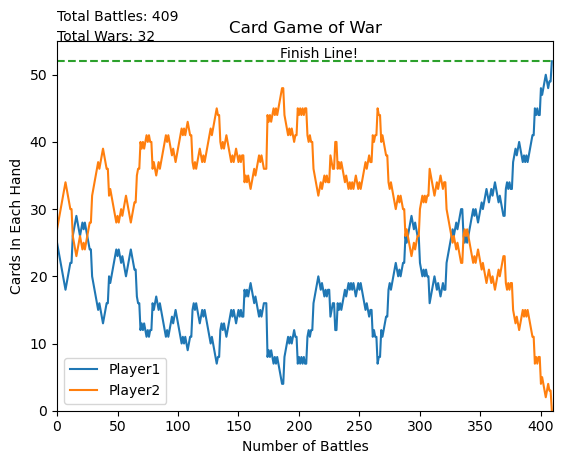

Player 1 Stats
          NUMBER
count  26.000000
mean    8.153846
std     3.996922
min     2.000000
25%     5.250000
50%     8.500000
75%    11.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.846154
std     3.618755
min     3.000000
25%     4.250000
50%     7.500000
75%    10.750000
max    14.000000
Player1 Wins!
Battle Count: 185
War Count: 11


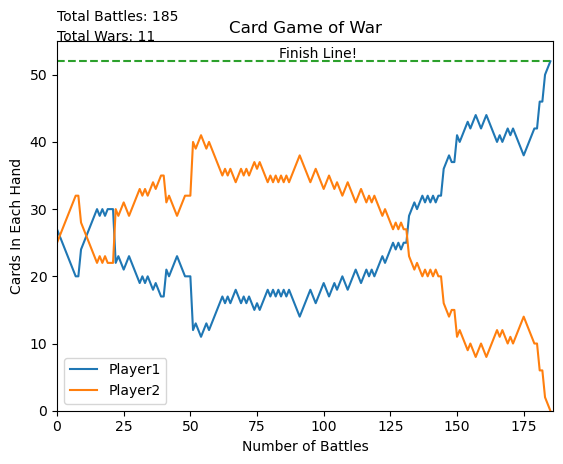

Player 1 Stats
          NUMBER
count  26.000000
mean    7.192308
std     3.688026
min     2.000000
25%     4.000000
50%     7.000000
75%     9.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.807692
std     3.763182
min     2.000000
25%     5.000000
50%    10.000000
75%    12.000000
max    14.000000
Player1 Wins!
Battle Count: 390
War Count: 33


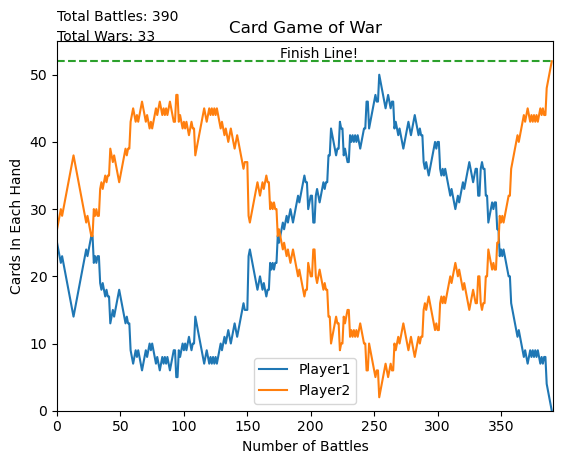

Player 1 Stats
          NUMBER
count  26.000000
mean    8.769231
std     3.766247
min     2.000000
25%     6.000000
50%     9.500000
75%    11.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.230769
std     3.701975
min     2.000000
25%     4.000000
50%     7.000000
75%     9.750000
max    14.000000
Player1 Wins!
Battle Count: 127
War Count: 5


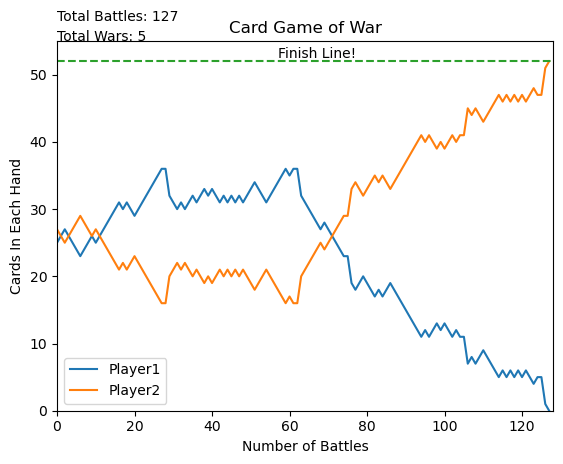

Player 1 Stats
          NUMBER
count  26.000000
mean    8.769231
std     3.891608
min     2.000000
25%     6.250000
50%     9.500000
75%    12.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.230769
std     3.569960
min     2.000000
25%     5.000000
50%     6.500000
75%     9.750000
max    14.000000
Player1 Wins!
Battle Count: 274
War Count: 16


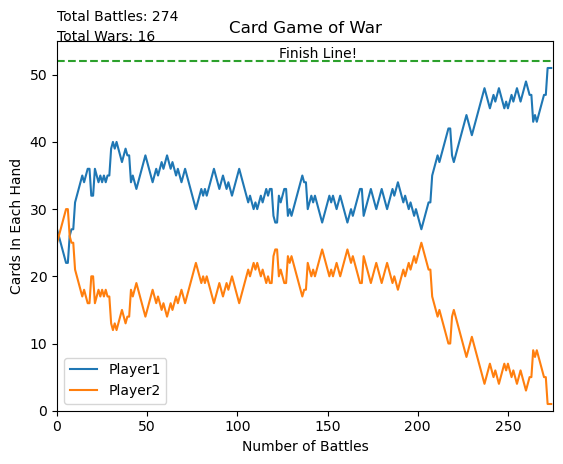

Player 1 Stats
          NUMBER
count  26.000000
mean    8.538462
std     4.071666
min     2.000000
25%     6.000000
50%     9.000000
75%    12.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.461538
std     3.455208
min     2.000000
25%     4.250000
50%     7.000000
75%    10.000000
max    13.000000
Player1 Wins!
Battle Count: 68
War Count: 2


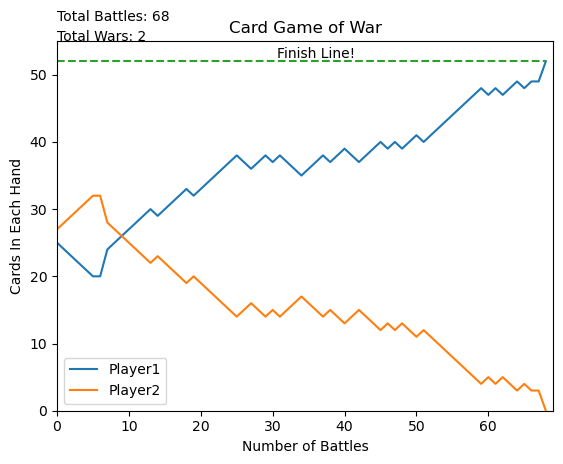

Player 1 Stats
          NUMBER
count  26.000000
mean    7.576923
std     3.754177
min     2.000000
25%     4.250000
50%     7.500000
75%    10.500000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.423077
std     3.828034
min     2.000000
25%     5.250000
50%     9.500000
75%    11.750000
max    14.000000
Player1 Wins!
Battle Count: 160
War Count: 11


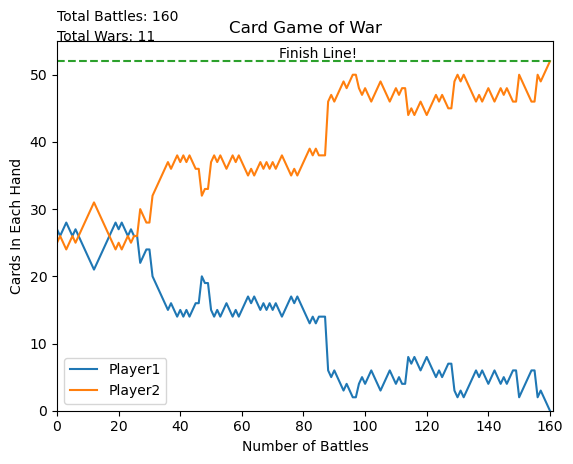

Player 1 Stats
          NUMBER
count  26.000000
mean    8.153846
std     4.388096
min     2.000000
25%     4.250000
50%     8.000000
75%    12.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.846154
std     3.132951
min     2.000000
25%     5.250000
50%     8.000000
75%    10.000000
max    14.000000
Player1 Wins!
Battle Count: 216
War Count: 21


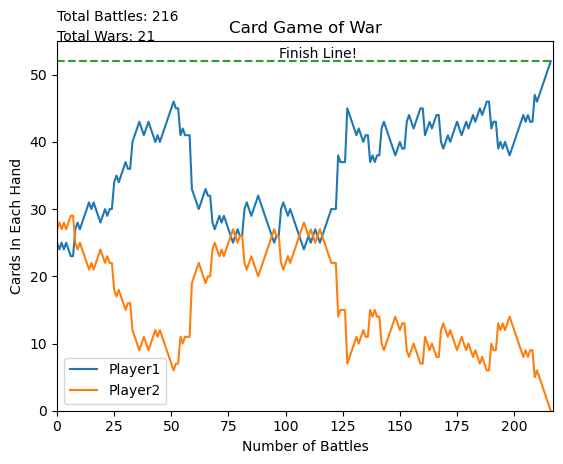

Player 1 Stats
          NUMBER
count  26.000000
mean    8.384615
std     3.806068
min     2.000000
25%     5.000000
50%     9.000000
75%    11.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.615385
std     3.784991
min     2.000000
25%     4.250000
50%     7.500000
75%    11.000000
max    13.000000
Player1 Wins!
Battle Count: 667
War Count: 30


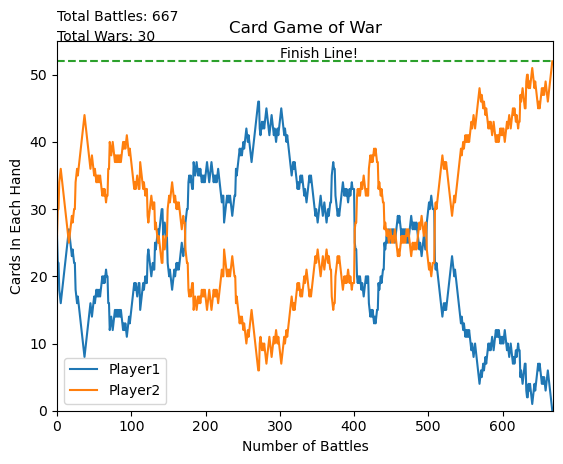

Player 1 Stats
          NUMBER
count  26.000000
mean    8.153846
std     3.996922
min     2.000000
25%     4.250000
50%     7.500000
75%    12.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.846154
std     3.618755
min     2.000000
25%     5.000000
50%     8.000000
75%    10.750000
max    14.000000
Player1 Wins!
Battle Count: 61
War Count: 5


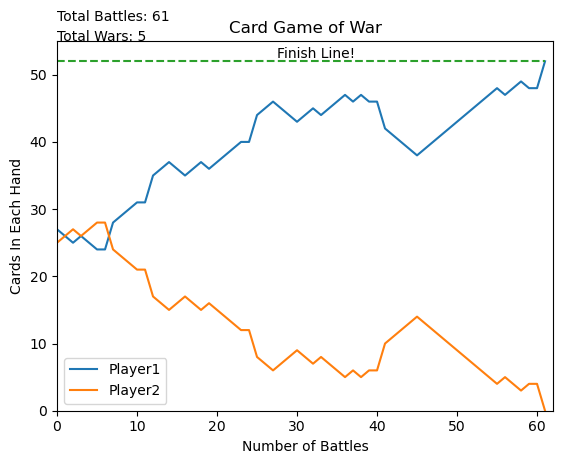

Player 1 Stats
          NUMBER
count  26.000000
mean    8.115385
std     3.433097
min     2.000000
25%     5.250000
50%     8.000000
75%    10.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.884615
std     4.160067
min     2.000000
25%     4.250000
50%     7.500000
75%    11.750000
max    14.000000
Player1 Wins!
Battle Count: 31
War Count: 5


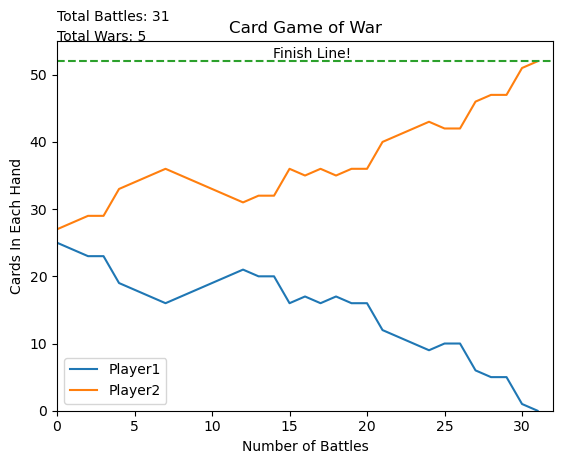

Player 1 Stats
          NUMBER
count  26.000000
mean    8.538462
std     3.849475
min     2.000000
25%     6.000000
50%     8.500000
75%    12.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.461538
std     3.701143
min     2.000000
25%     5.000000
50%     7.000000
75%    10.750000
max    14.000000
Player1 Wins!
Battle Count: 311
War Count: 17


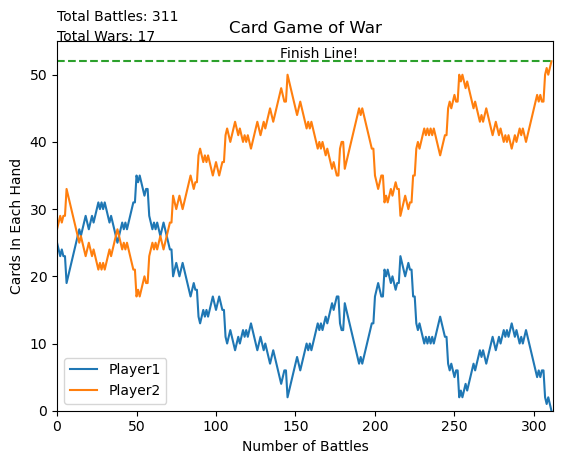

Player 1 Stats
          NUMBER
count  26.000000
mean    8.500000
std     3.385262
min     2.000000
25%     6.000000
50%     9.000000
75%    11.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.500000
std     4.140048
min     2.000000
25%     4.000000
50%     7.000000
75%    10.750000
max    14.000000
Player1 Wins!
Battle Count: 465
War Count: 24


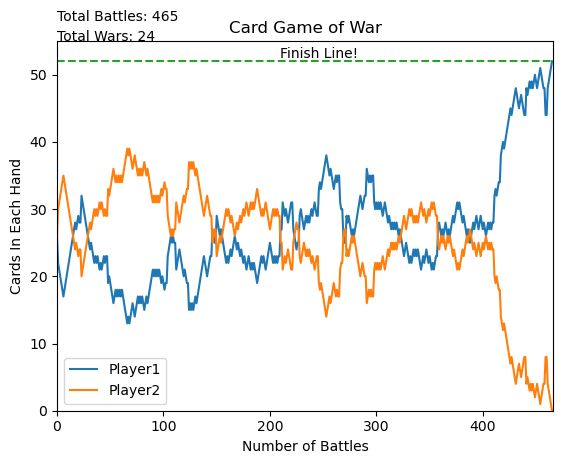

Player 1 Stats
          NUMBER
count  26.000000
mean    8.807692
std     3.698856
min     3.000000
25%     5.250000
50%     9.000000
75%    11.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.192308
std     3.752538
min     2.000000
25%     4.000000
50%     7.000000
75%    10.000000
max    13.000000
Player1 Wins!
Battle Count: 715
War Count: 51


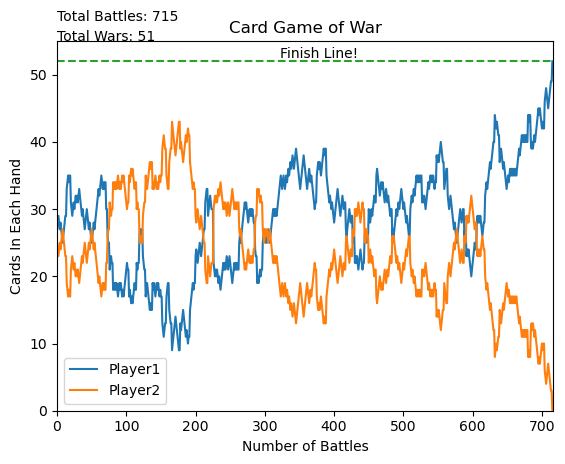

Player 1 Stats
          NUMBER
count  26.000000
mean    7.769231
std     3.870997
min     2.000000
25%     4.250000
50%     7.000000
75%    11.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.230769
std     3.744945
min     2.000000
25%     5.250000
50%     8.500000
75%    11.000000
max    14.000000
Player1 Wins!
Battle Count: 212
War Count: 12


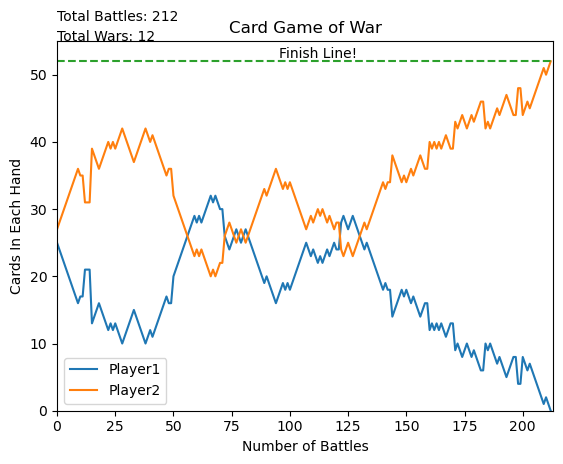

Player 1 Stats
          NUMBER
count  26.000000
mean    8.153846
std     3.966785
min     2.000000
25%     5.000000
50%     8.500000
75%    11.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.846154
std     3.651765
min     2.000000
25%     5.000000
50%     7.000000
75%    11.000000
max    14.000000
Player1 Wins!
Battle Count: 217
War Count: 14


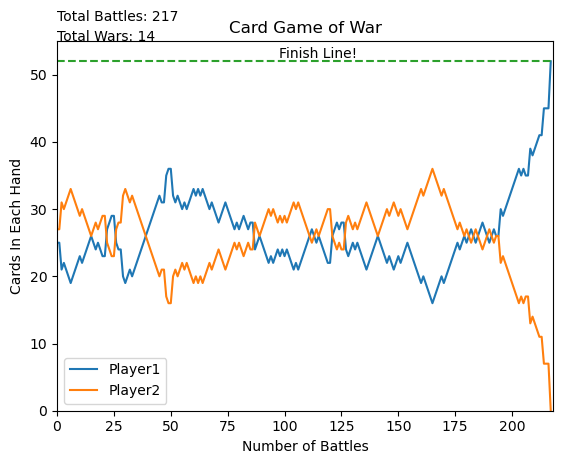

Player 1 Stats
          NUMBER
count  26.000000
mean    8.153846
std     3.936418
min     2.000000
25%     5.000000
50%     8.000000
75%    11.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.846154
std     3.684479
min     2.000000
25%     4.250000
50%     8.000000
75%    10.000000
max    14.000000
Player1 Wins!
Battle Count: 49
War Count: 4


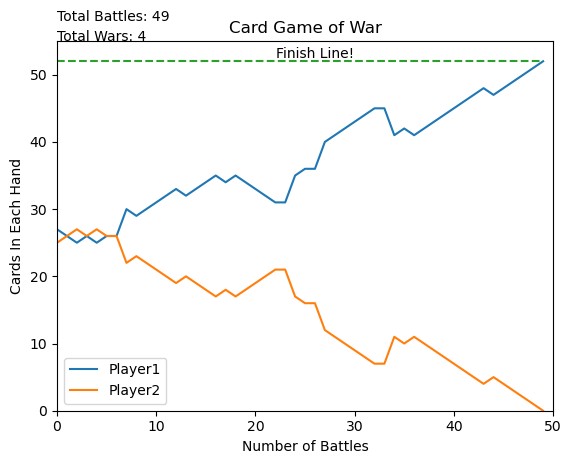

Player 1 Stats
          NUMBER
count  26.000000
mean    8.461538
std     3.101364
min     3.000000
25%     6.000000
50%     9.000000
75%    10.750000
max    13.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.538462
std     4.365600
min     2.000000
25%     3.250000
50%     7.000000
75%    11.750000
max    14.000000
Player1 Wins!
Battle Count: 1292
War Count: 72


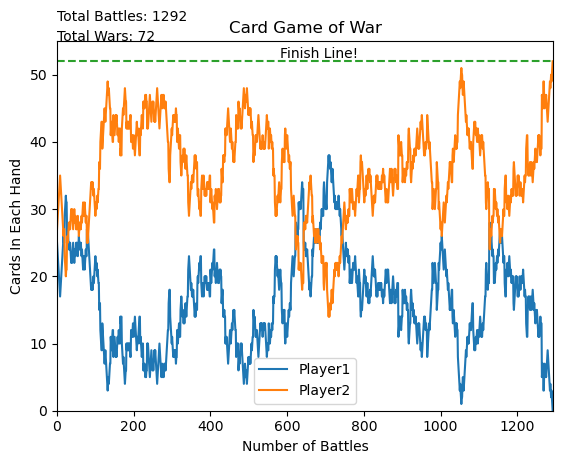

Player 1 Stats
          NUMBER
count  26.000000
mean    8.269231
std     4.005573
min     2.000000
25%     5.000000
50%     9.500000
75%    11.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.730769
std     3.595082
min     2.000000
25%     5.000000
50%     7.500000
75%    10.500000
max    14.000000
Player1 Wins!
Battle Count: 470
War Count: 26


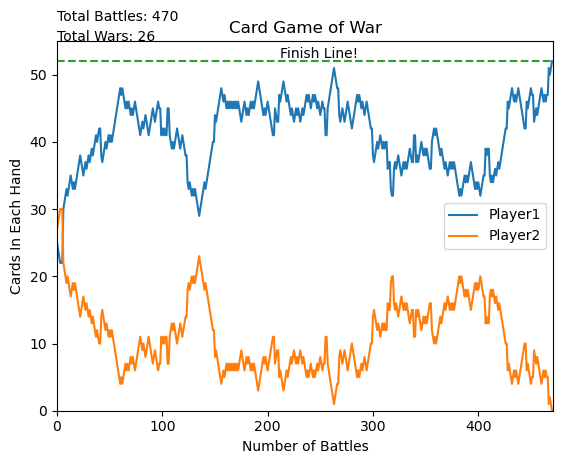

Player 1 Stats
          NUMBER
count  26.000000
mean    7.730769
std     3.527693
min     2.000000
25%     4.250000
50%     7.500000
75%    10.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.269231
std     4.065048
min     2.000000
25%     5.000000
50%     8.000000
75%    12.000000
max    14.000000
Player1 Wins!
Battle Count: 130
War Count: 10


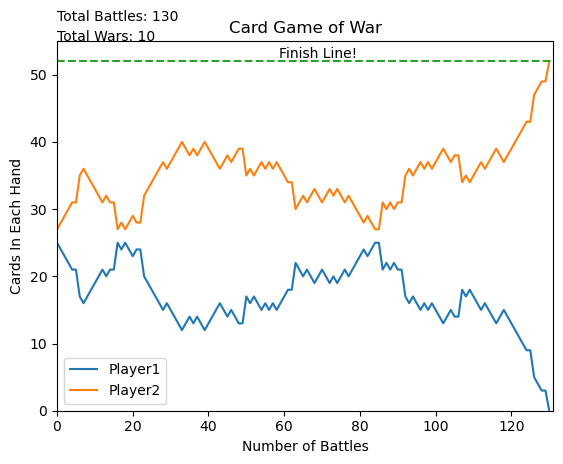

Player 1 Stats
          NUMBER
count  26.000000
mean    8.038462
std     3.820793
min     2.000000
25%     5.000000
50%     7.500000
75%    11.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.961538
std     3.810310
min     2.000000
25%     5.000000
50%     8.500000
75%    11.000000
max    14.000000
Player1 Wins!
Battle Count: 613
War Count: 33


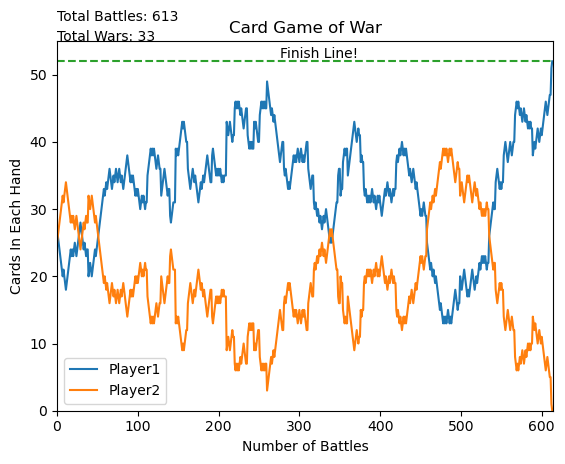

Player 1 Stats
          NUMBER
count  26.000000
mean    8.230769
std     3.547480
min     2.000000
25%     6.000000
50%     9.000000
75%    11.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.769231
std     4.052729
min     2.000000
25%     4.000000
50%     7.500000
75%    11.500000
max    14.000000
Player1 Wins!
Battle Count: 735
War Count: 33


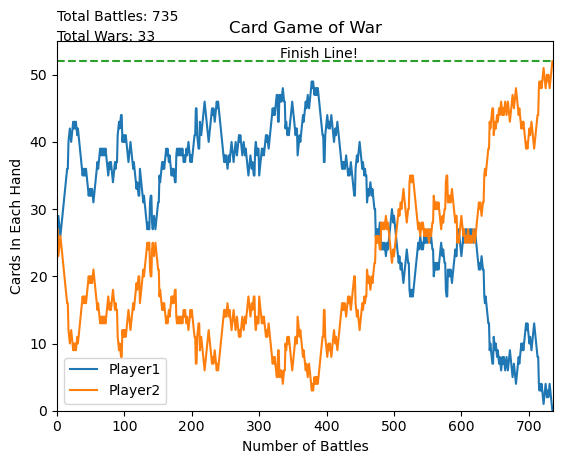

Player 1 Stats
          NUMBER
count  26.000000
mean    7.615385
std     3.878937
min     2.000000
25%     4.250000
50%     7.500000
75%    11.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.384615
std     3.710277
min     3.000000
25%     5.000000
50%     8.000000
75%    12.000000
max    14.000000
Player1 Wins!
Battle Count: 219
War Count: 12


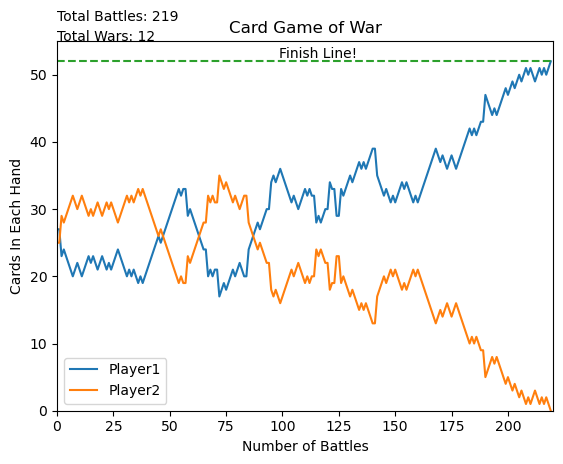

Player 1 Stats
          NUMBER
count  26.000000
mean    8.000000
std     4.166533
min     2.000000
25%     4.250000
50%     8.500000
75%    11.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.000000
std     3.429286
min     2.000000
25%     6.000000
50%     7.500000
75%    11.000000
max    14.000000
Player1 Wins!
Battle Count: 84
War Count: 10


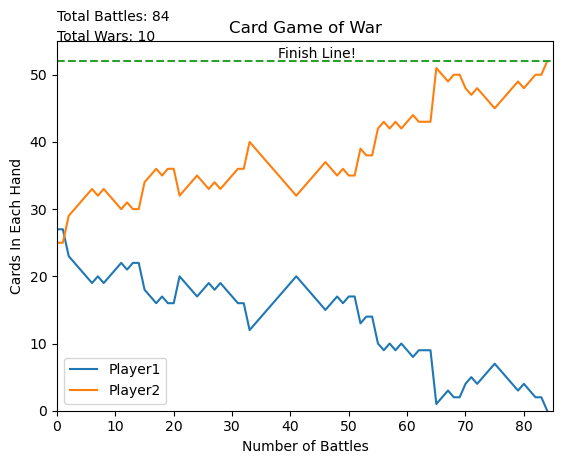

Player 1 Stats
          NUMBER
count  26.000000
mean    8.884615
std     3.547697
min     2.000000
25%     7.000000
50%     9.500000
75%    11.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.115385
std     3.860849
min     2.000000
25%     4.000000
50%     6.000000
75%     9.750000
max    14.000000
Player1 Wins!
Battle Count: 150
War Count: 9


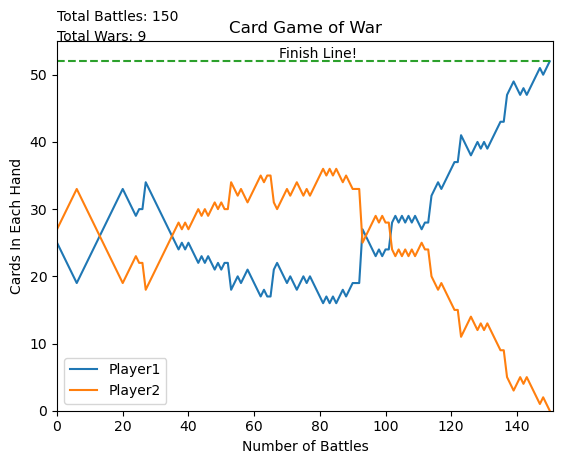

Player 1 Stats
          NUMBER
count  26.000000
mean    7.192308
std     3.510205
min     2.000000
25%     4.000000
50%     7.000000
75%    10.000000
max    12.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.807692
std     3.929572
min     2.000000
25%     5.250000
50%     8.500000
75%    13.000000
max    14.000000
Player1 Wins!
Battle Count: 67
War Count: 3


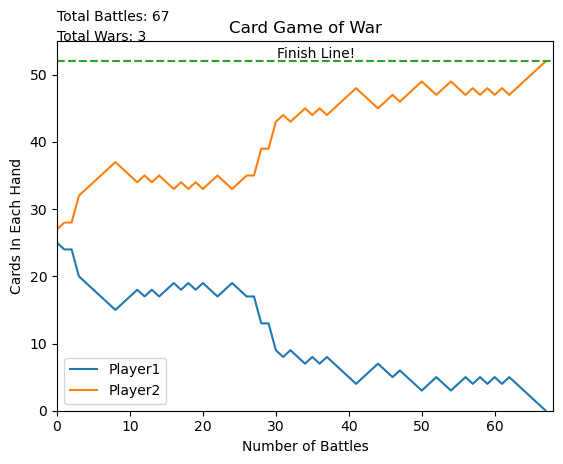

Player 1 Stats
          NUMBER
count  26.000000
mean    8.230769
std     3.755611
min     2.000000
25%     6.000000
50%     8.500000
75%    10.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.769231
std     3.860650
min     2.000000
25%     4.250000
50%     7.000000
75%    11.750000
max    14.000000
Player1 Wins!
Battle Count: 156
War Count: 7


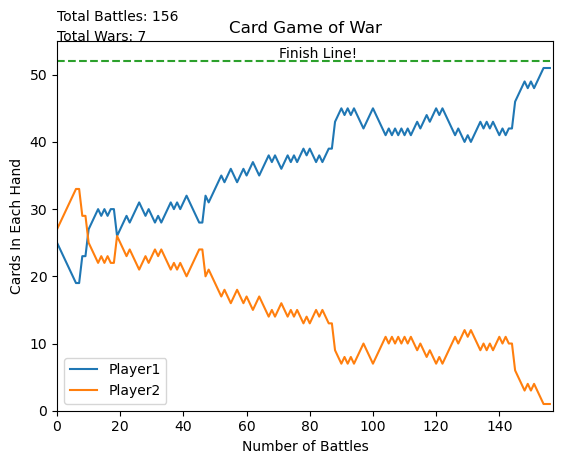

Player 1 Stats
          NUMBER
count  26.000000
mean    7.653846
std     3.654502
min     2.000000
25%     5.000000
50%     7.000000
75%    11.000000
max    13.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.346154
std     3.938957
min     2.000000
25%     4.250000
50%     9.000000
75%    11.000000
max    14.000000
Player1 Wins!
Battle Count: 98
War Count: 4


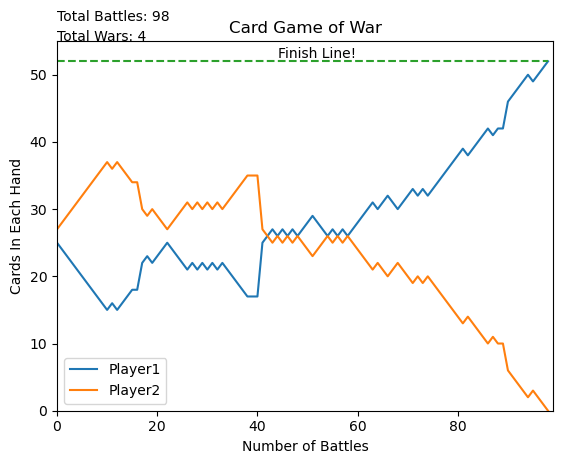

Player 1 Stats
          NUMBER
count  26.000000
mean    8.615385
std     3.806068
min     2.000000
25%     6.000000
50%     8.000000
75%    12.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.384615
std     3.721042
min     2.000000
25%     4.000000
50%     7.500000
75%    10.000000
max    14.000000
Player1 Wins!
Battle Count: 58
War Count: 4


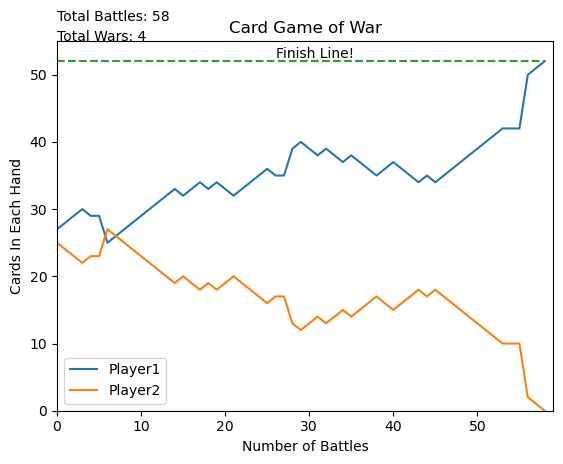

Player 1 Stats
          NUMBER
count  26.000000
mean    7.961538
std     4.247171
min     2.000000
25%     4.250000
50%     7.500000
75%    12.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.038462
std     3.328432
min     3.000000
25%     5.000000
50%     8.000000
75%    10.000000
max    14.000000
Player1 Wins!
Battle Count: 55
War Count: 5


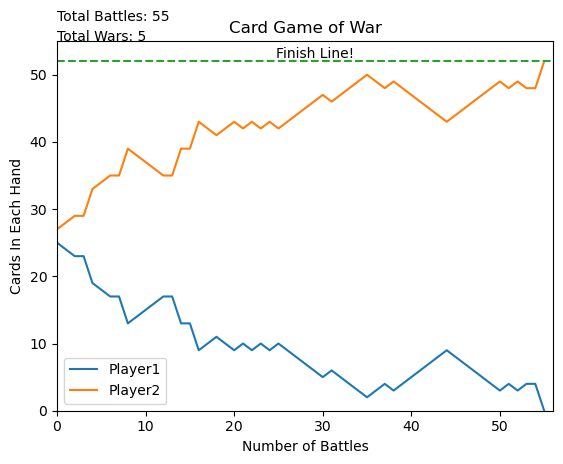

Player 1 Stats
          NUMBER
count  26.000000
mean    8.346154
std     3.393433
min     2.000000
25%     6.000000
50%     9.000000
75%    11.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.653846
std     4.165979
min     2.000000
25%     4.000000
50%     7.000000
75%    11.500000
max    14.000000
Player1 Wins!
Battle Count: 253
War Count: 25


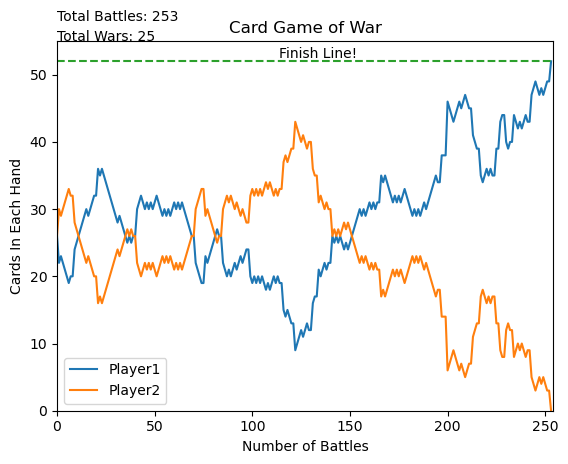

Player 1 Stats
          NUMBER
count  26.000000
mean    7.500000
std     3.982462
min     2.000000
25%     4.250000
50%     6.500000
75%    11.500000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.500000
std     3.569314
min     2.000000
25%     6.250000
50%     9.000000
75%    11.000000
max    14.000000
Player1 Wins!
Battle Count: 450
War Count: 26


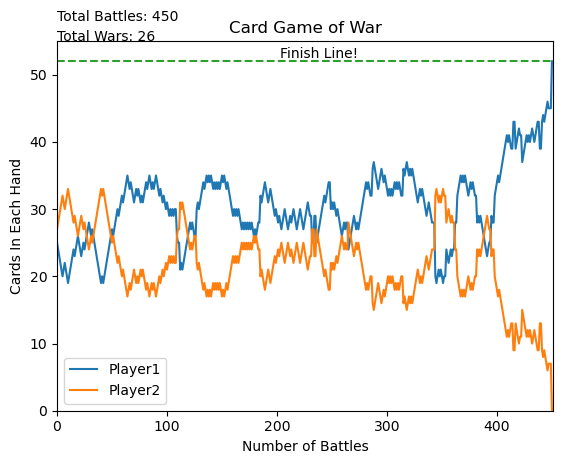

Player 1 Stats
          NUMBER
count  26.000000
mean    7.807692
std     3.815958
min     2.000000
25%     4.250000
50%     8.000000
75%    10.750000
max    13.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.192308
std     3.805462
min     2.000000
25%     5.000000
50%     7.500000
75%    11.750000
max    14.000000
Player1 Wins!
Battle Count: 176
War Count: 9


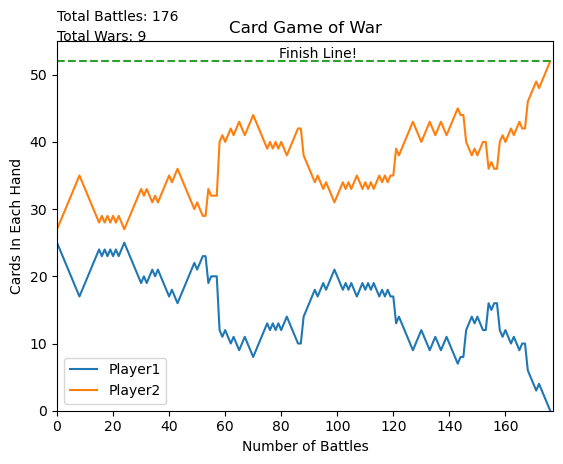

Player 1 Stats
          NUMBER
count  26.000000
mean    8.115385
std     3.513709
min     2.000000
25%     5.250000
50%     8.500000
75%    10.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.884615
std     4.092206
min     2.000000
25%     4.250000
50%     8.000000
75%    11.750000
max    14.000000
Player1 Wins!
Battle Count: 45
War Count: 4


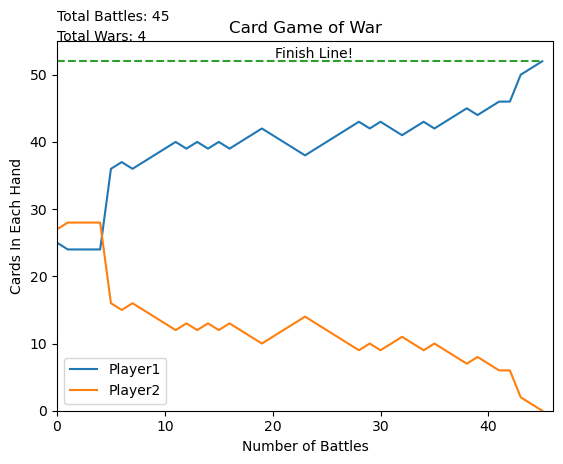

Player 1 Stats
          NUMBER
count  26.000000
mean    7.769231
std     4.013056
min     2.000000
25%     4.250000
50%     8.000000
75%    11.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.230769
std     3.592299
min     2.000000
25%     5.250000
50%     8.500000
75%    11.000000
max    14.000000
Player1 Wins!
Battle Count: 667
War Count: 46


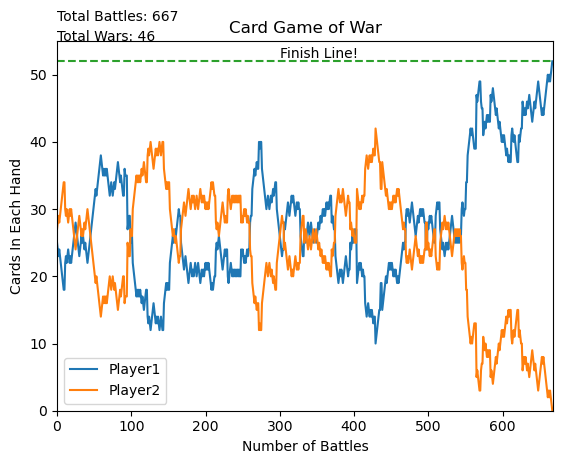

Player 1 Stats
          NUMBER
count  26.000000
mean    9.153846
std     3.716905
min     2.000000
25%     6.250000
50%    10.000000
75%    12.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    6.846154
std     3.540535
min     2.000000
25%     4.000000
50%     6.500000
75%     9.000000
max    14.000000
Player1 Wins!
Battle Count: 538
War Count: 32


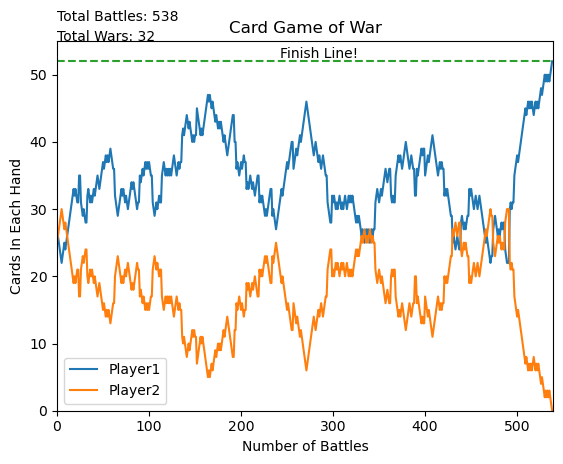

Player 1 Stats
          NUMBER
count  26.000000
mean    8.307692
std     3.530090
min     2.000000
25%     5.250000
50%     8.000000
75%    11.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.692308
std     4.057282
min     2.000000
25%     4.000000
50%     7.500000
75%    11.750000
max    14.000000
Player1 Wins!
Battle Count: 129
War Count: 8


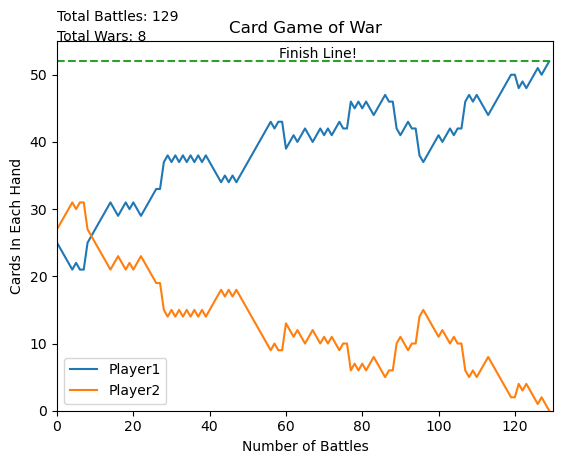

Player 1 Stats
          NUMBER
count  26.000000
mean    8.384615
std     3.299417
min     3.000000
25%     6.000000
50%     9.000000
75%    11.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.615385
std     4.233929
min     2.000000
25%     4.000000
50%     7.000000
75%    11.750000
max    14.000000
Player1 Wins!
Battle Count: 73
War Count: 5


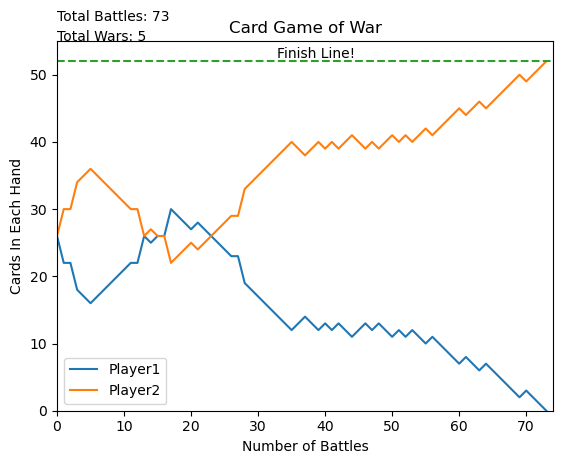

Player 1 Stats
          NUMBER
count  26.000000
mean    7.692308
std     4.183484
min     2.000000
25%     3.250000
50%     8.500000
75%    11.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.307692
std     3.379577
min     3.000000
25%     6.000000
50%     7.500000
75%    11.750000
max    14.000000
Player1 Wins!
Battle Count: 160
War Count: 5


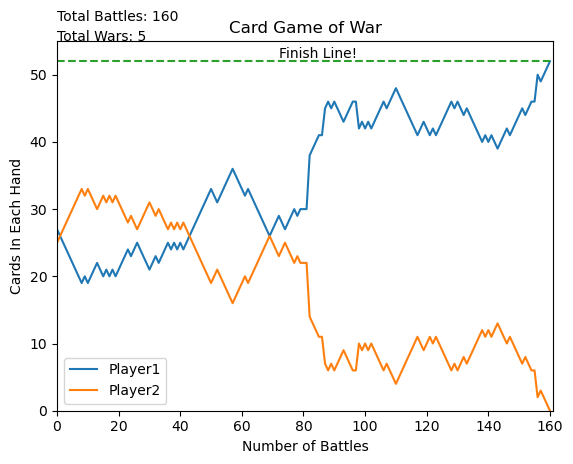

Player 1 Stats
          NUMBER
count  26.000000
mean    8.000000
std     3.794733
min     2.000000
25%     5.000000
50%     8.000000
75%    11.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.000000
std     3.836665
min     2.000000
25%     5.000000
50%     7.000000
75%    11.500000
max    14.000000
Player1 Wins!
Battle Count: 120
War Count: 7


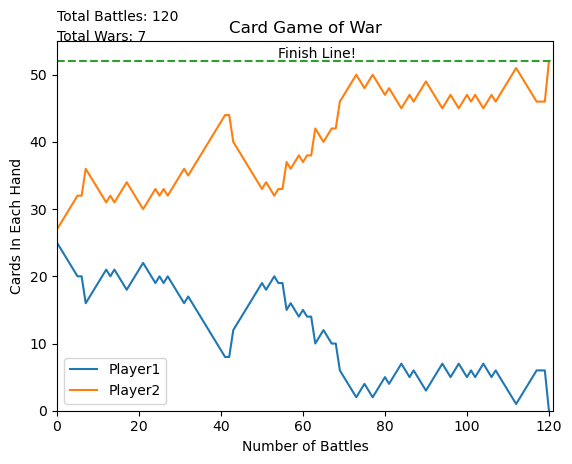

Player 1 Stats
          NUMBER
count  26.000000
mean    8.423077
std     4.168195
min     2.000000
25%     5.000000
50%     9.000000
75%    12.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.576923
std     3.372513
min     2.000000
25%     5.000000
50%     7.000000
75%    10.750000
max    14.000000
Player1 Wins!
Battle Count: 89
War Count: 7


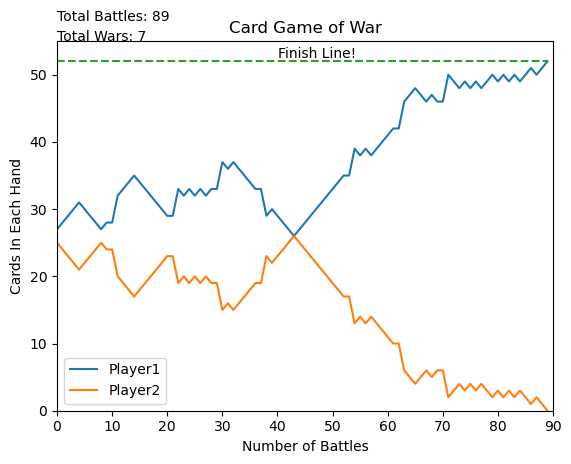

Player 1 Stats
          NUMBER
count  26.000000
mean    8.461538
std     3.890818
min     2.000000
25%     5.250000
50%     8.500000
75%    11.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.538462
std     3.679465
min     2.000000
25%     4.250000
50%     7.000000
75%    10.750000
max    13.000000
Player1 Wins!
Battle Count: 148
War Count: 9


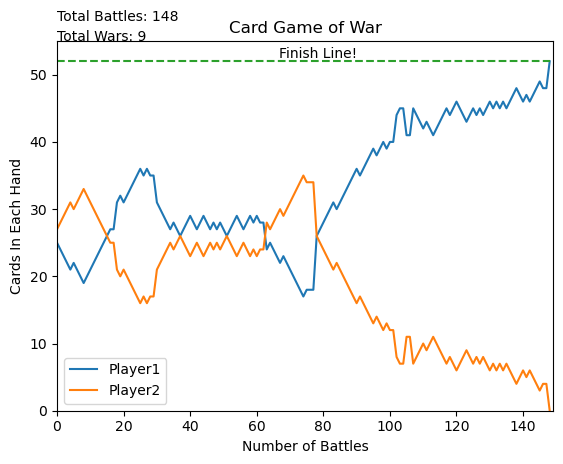

Player 1 Stats
          NUMBER
count  26.000000
mean    7.769231
std     3.421201
min     2.000000
25%     5.000000
50%     7.500000
75%    10.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.230769
std     4.159882
min     2.000000
25%     4.000000
50%     8.500000
75%    12.000000
max    14.000000
Player1 Wins!
Battle Count: 170
War Count: 14


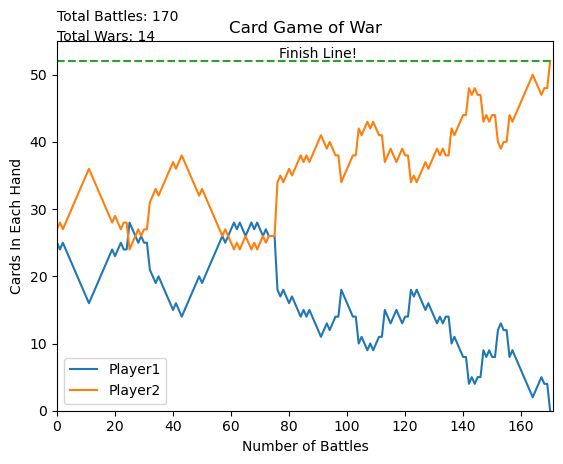

Player 1 Stats
          NUMBER
count  26.000000
mean    7.807692
std     3.919380
min     2.000000
25%     4.000000
50%     8.000000
75%    11.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.192308
std     3.698856
min     2.000000
25%     5.250000
50%     8.000000
75%    10.750000
max    14.000000
Player1 Wins!
Battle Count: 139
War Count: 4


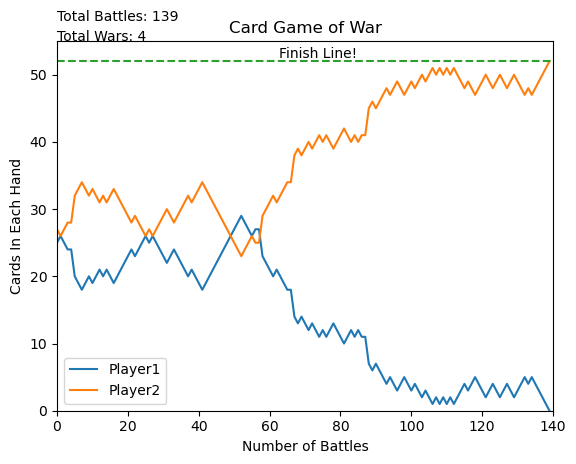

Player 1 Stats
          NUMBER
count  26.000000
mean    7.500000
std     3.408812
min     2.000000
25%     5.000000
50%     7.500000
75%    10.000000
max    14.000000
Player 2 Stats
         NUMBER
count  26.00000
mean    8.50000
std     4.12068
min     2.00000
25%     4.50000
50%     8.50000
75%    12.00000
max    14.00000
Player1 Wins!
Battle Count: 513
War Count: 34


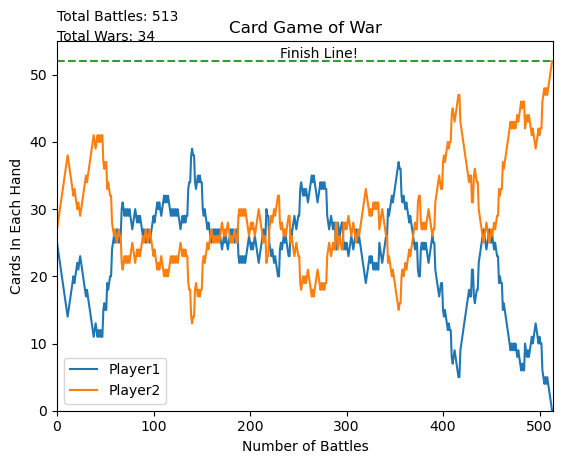

Player 1 Stats
          NUMBER
count  26.000000
mean    8.115385
std     3.636778
min     2.000000
25%     5.000000
50%     7.500000
75%    11.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.884615
std     3.983234
min     2.000000
25%     4.250000
50%     8.000000
75%    11.750000
max    14.000000
Player1 Wins!
Battle Count: 114
War Count: 7


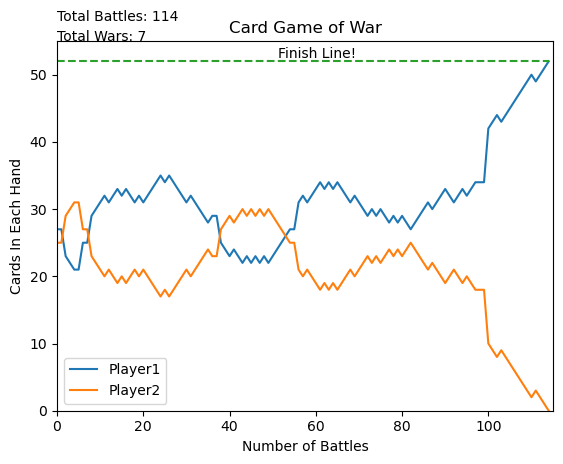

Player 1 Stats
          NUMBER
count  26.000000
mean    7.307692
std     3.916828
min     2.000000
25%     4.000000
50%     7.000000
75%    10.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.692308
std     3.575128
min     2.000000
25%     6.000000
50%     9.000000
75%    11.750000
max    14.000000
Player1 Wins!
Battle Count: 237
War Count: 14


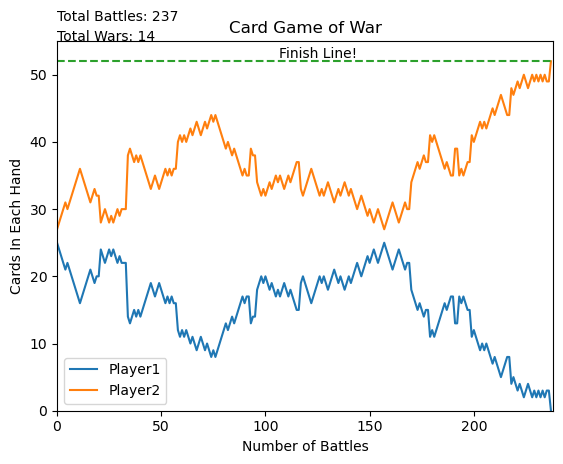

Player 1 Stats
          NUMBER
count  26.000000
mean    8.384615
std     3.225857
min     3.000000
25%     6.000000
50%     9.000000
75%    10.750000
max    13.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.615385
std     4.290239
min     2.000000
25%     4.250000
50%     7.500000
75%    11.000000
max    14.000000
Player1 Wins!
Battle Count: 274
War Count: 10


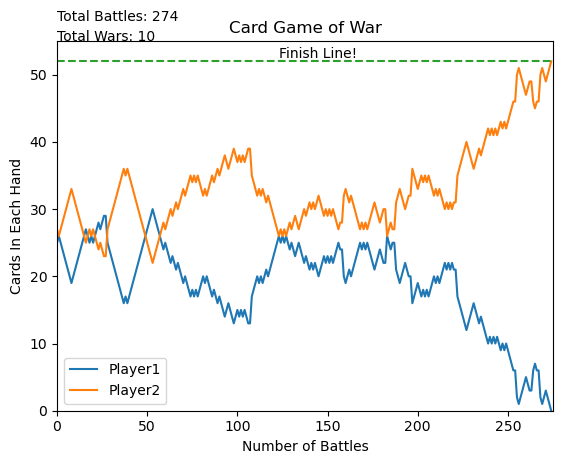

Player 1 Stats
          NUMBER
count  26.000000
mean    8.000000
std     4.204759
min     2.000000
25%     4.250000
50%     8.000000
75%    12.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.000000
std     3.382307
min     2.000000
25%     5.250000
50%     8.000000
75%    10.750000
max    14.000000
Player1 Wins!
Battle Count: 645
War Count: 32


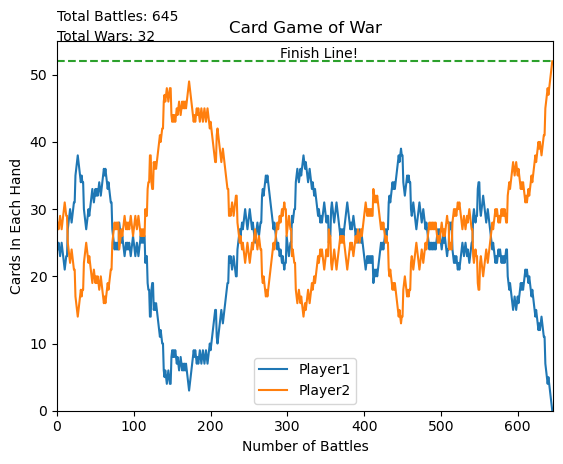

Player 1 Stats
          NUMBER
count  26.000000
mean    8.500000
std     3.786819
min     2.000000
25%     6.000000
50%     9.000000
75%    11.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.500000
std     3.776242
min     2.000000
25%     4.000000
50%     7.500000
75%    11.000000
max    14.000000
Player1 Wins!
Battle Count: 396
War Count: 22


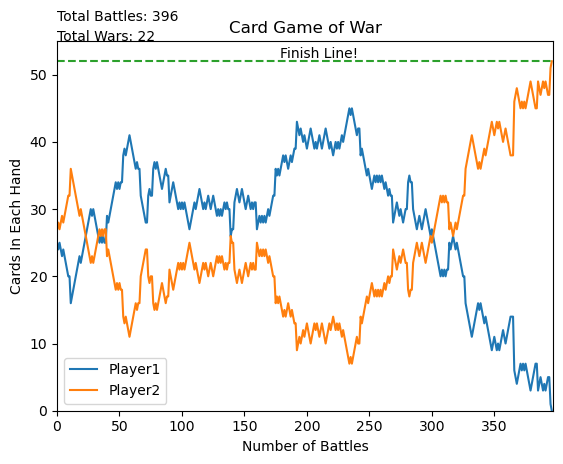

Player 1 Stats
          NUMBER
count  26.000000
mean    8.500000
std     3.420526
min     3.000000
25%     6.000000
50%     8.500000
75%    11.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.500000
std     4.110961
min     2.000000
25%     4.000000
50%     7.500000
75%    11.000000
max    14.000000
Player1 Wins!
Battle Count: 391
War Count: 20


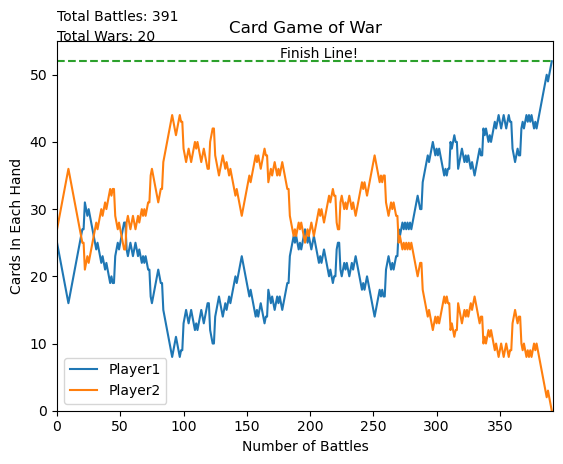

Player 1 Stats
          NUMBER
count  26.000000
mean    7.461538
std     3.408586
min     2.000000
25%     4.250000
50%     7.500000
75%    10.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.538462
std     4.110774
min     2.000000
25%     5.000000
50%     9.000000
75%    12.750000
max    14.000000
Player1 Wins!
Battle Count: 345
War Count: 17


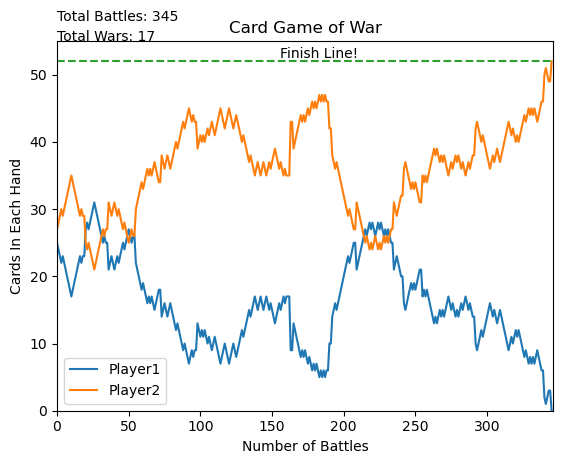

Player 1 Stats
          NUMBER
count  26.000000
mean    7.769231
std     4.023011
min     2.000000
25%     4.250000
50%     7.000000
75%    11.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.230769
std     3.581147
min     2.000000
25%     5.250000
50%     9.000000
75%    11.000000
max    14.000000
Player1 Wins!
Battle Count: 775
War Count: 47


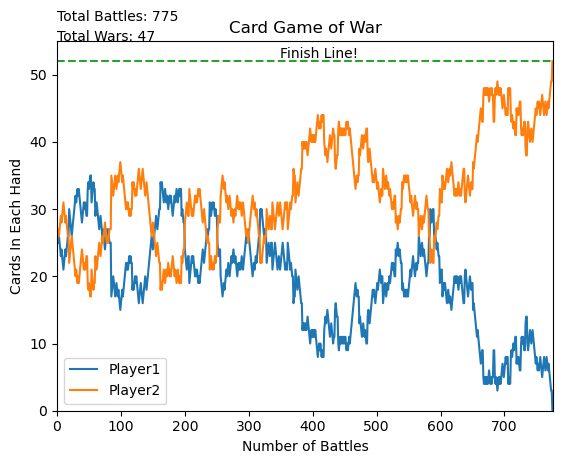

Player 1 Stats
          NUMBER
count  26.000000
mean    8.038462
std     3.757454
min     2.000000
25%     5.250000
50%     8.000000
75%    10.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.961538
std     3.872785
min     2.000000
25%     5.000000
50%     7.000000
75%    11.750000
max    14.000000
Player1 Wins!
Battle Count: 259
War Count: 17


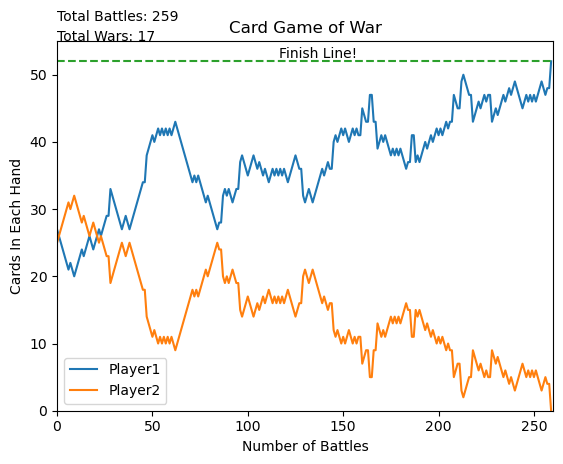

Player 1 Stats
          NUMBER
count  26.000000
mean    8.423077
std     3.991722
min     2.000000
25%     5.000000
50%     8.500000
75%    12.500000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.576923
std     3.579643
min     2.000000
25%     5.000000
50%     8.000000
75%    10.000000
max    14.000000
Player1 Wins!
Battle Count: 147
War Count: 7


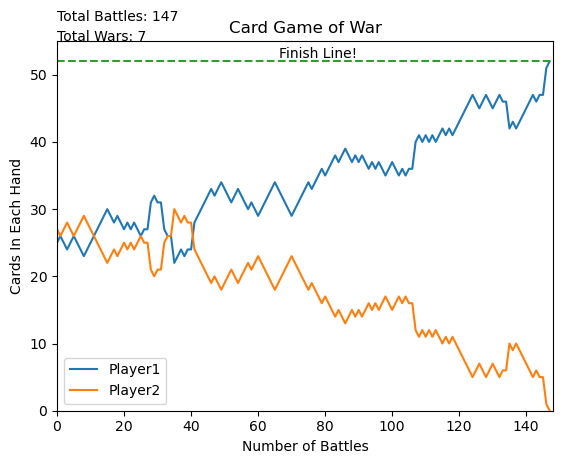

Player 1 Stats
          NUMBER
count  26.000000
mean    8.615385
std     4.109277
min     2.000000
25%     5.250000
50%     9.000000
75%    12.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.384615
std     3.383216
min     2.000000
25%     5.000000
50%     7.000000
75%    10.000000
max    14.000000
Player1 Wins!
Battle Count: 398
War Count: 18


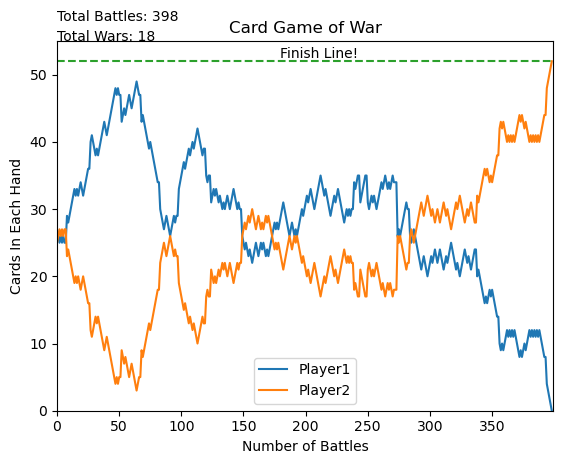

Player 1 Stats
          NUMBER
count  26.000000
mean    8.538462
std     3.901085
min     2.000000
25%     6.000000
50%     8.500000
75%    12.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.461538
std     3.646706
min     2.000000
25%     5.000000
50%     8.000000
75%    10.000000
max    14.000000
Player1 Wins!
Battle Count: 529
War Count: 32


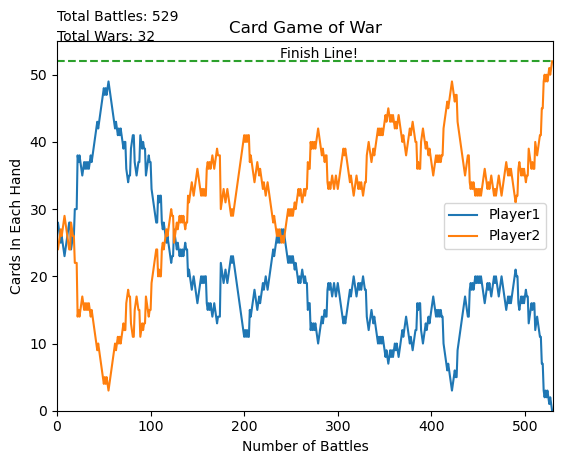

Player 1 Stats
          NUMBER
count  26.000000
mean    8.423077
std     3.722076
min     3.000000
25%     5.000000
50%     9.500000
75%    11.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.576923
std     3.859255
min     2.000000
25%     4.250000
50%     7.500000
75%     9.750000
max    14.000000
Player1 Wins!
Battle Count: 98
War Count: 5


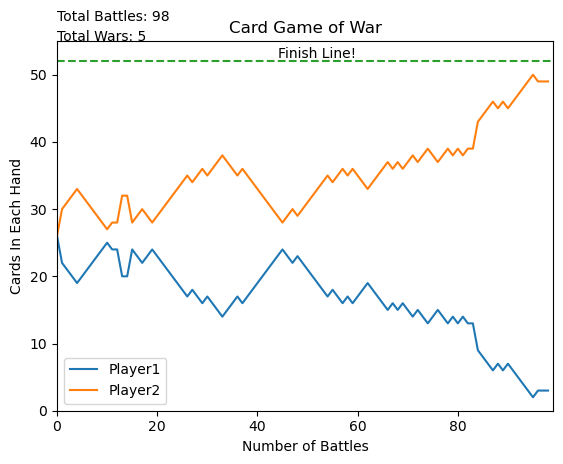

Player 1 Stats
          NUMBER
count  26.000000
mean    7.230769
std     3.818981
min     2.000000
25%     3.250000
50%     7.500000
75%    10.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.769231
std     3.647549
min     2.000000
25%     6.000000
50%     8.500000
75%    12.000000
max    14.000000
Player1 Wins!
Battle Count: 143
War Count: 7


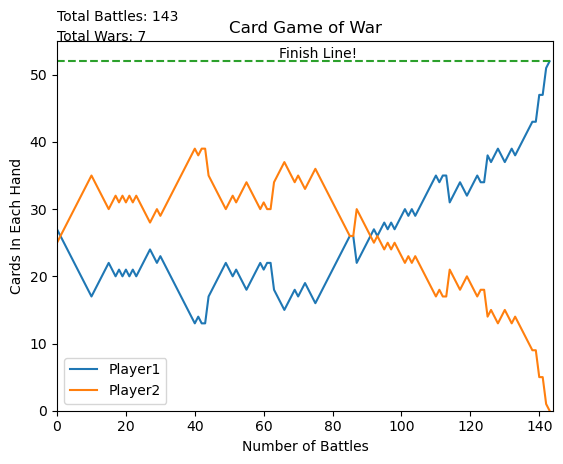

Player 1 Stats
          NUMBER
count  26.000000
mean    7.923077
std     3.643329
min     2.000000
25%     5.000000
50%     8.000000
75%    11.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.076923
std     3.979177
min     2.000000
25%     4.250000
50%     8.000000
75%    11.750000
max    14.000000
Player1 Wins!
Battle Count: 353
War Count: 13


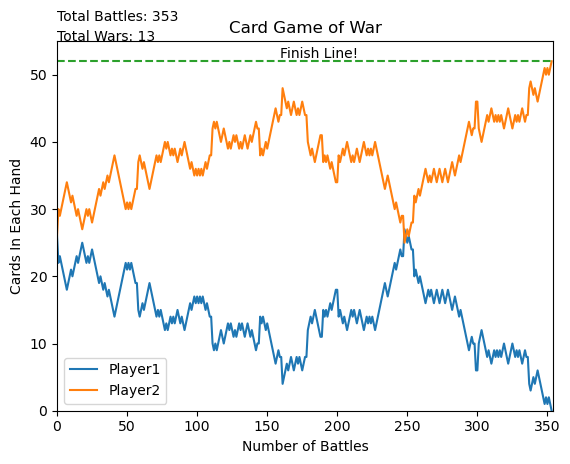

Player 1 Stats
          NUMBER
count  26.000000
mean    8.576923
std     3.931138
min     2.000000
25%     5.250000
50%     9.000000
75%    11.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.423077
std     3.601923
min     2.000000
25%     4.250000
50%     7.500000
75%    11.000000
max    13.000000
Player1 Wins!
Battle Count: 106
War Count: 3


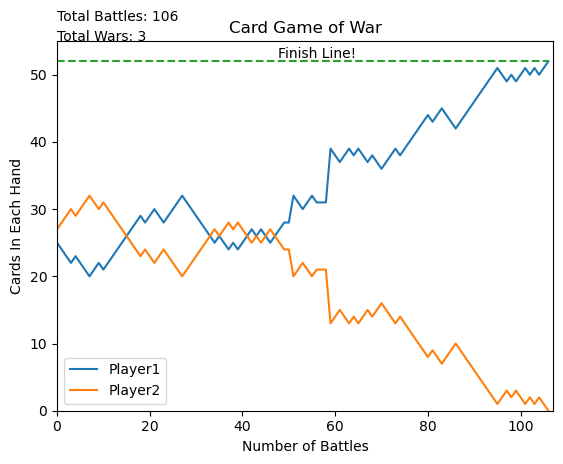

Player 1 Stats
          NUMBER
count  26.000000
mean    8.230769
std     3.647549
min     2.000000
25%     5.250000
50%     8.000000
75%    11.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.769231
std     3.962905
min     2.000000
25%     4.000000
50%     8.000000
75%    11.000000
max    14.000000
Player1 Wins!
Battle Count: 617
War Count: 39


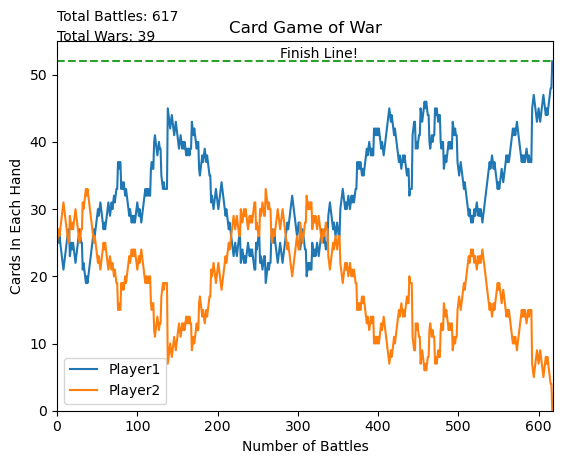

Player 1 Stats
          NUMBER
count  26.000000
mean    8.038462
std     4.171146
min     2.000000
25%     4.250000
50%     7.500000
75%    11.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.961538
std     3.423224
min     2.000000
25%     5.250000
50%     8.000000
75%    10.750000
max    13.000000
Player1 Wins!
Battle Count: 448
War Count: 17


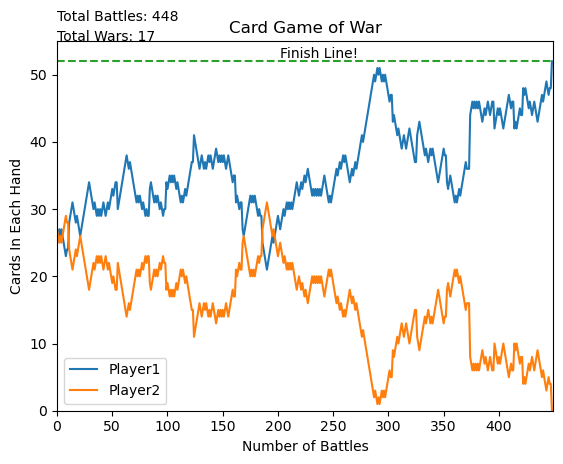

Player 1 Stats
          NUMBER
count  26.000000
mean    8.307692
std     3.749872
min     2.000000
25%     5.000000
50%     8.000000
75%    11.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.692308
std     3.855067
min     2.000000
25%     5.000000
50%     8.000000
75%    11.000000
max    14.000000
Player1 Wins!
Battle Count: 265
War Count: 15


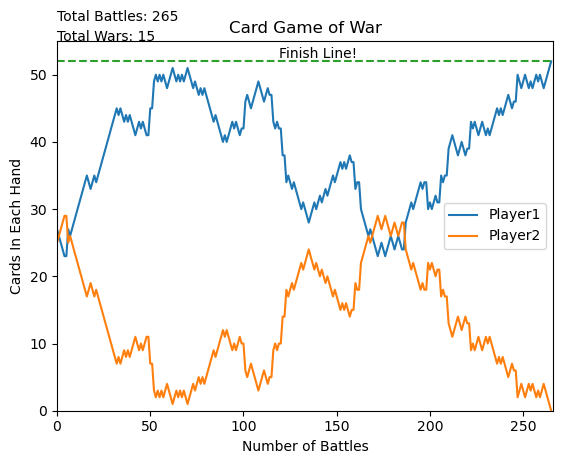

Player 1 Stats
          NUMBER
count  26.000000
mean    7.346154
std     3.309892
min     2.000000
25%     5.000000
50%     7.500000
75%     9.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.653846
std     4.156367
min     2.000000
25%     5.000000
50%     9.500000
75%    12.000000
max    14.000000
Player1 Wins!
Battle Count: 474
War Count: 24


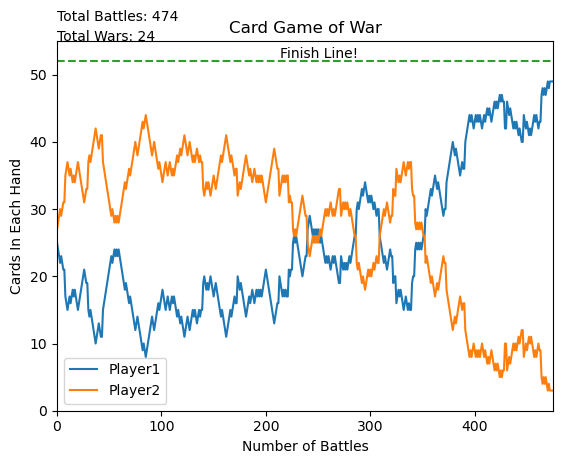

Player 1 Stats
          NUMBER
count  26.000000
mean    9.192308
std     3.611307
min     2.000000
25%     7.000000
50%    10.000000
75%    12.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    6.807692
std     3.622366
min     2.000000
25%     4.000000
50%     6.000000
75%     9.000000
max    14.000000
Player1 Wins!
Battle Count: 213
War Count: 12


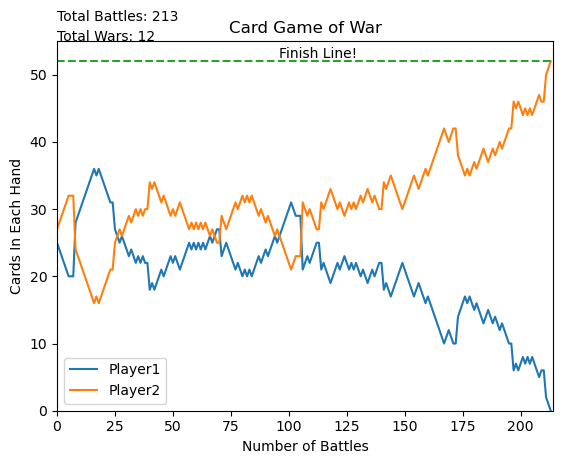

Player 1 Stats
          NUMBER
count  26.000000
mean    8.115385
std     3.536404
min     2.000000
25%     6.000000
50%     8.000000
75%    11.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.884615
std     4.072610
min     2.000000
25%     4.000000
50%     7.500000
75%    11.000000
max    14.000000
Player1 Wins!
Battle Count: 311
War Count: 25


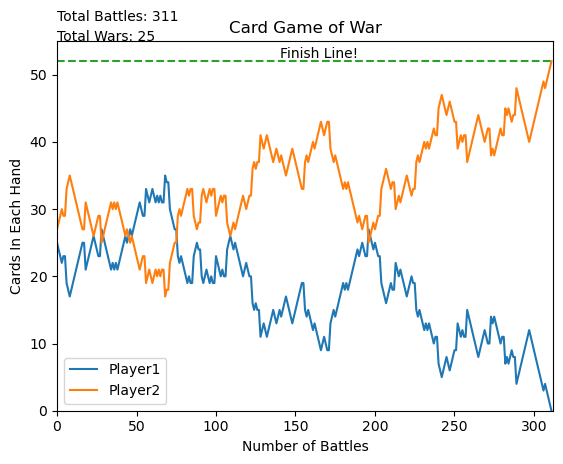

Player 1 Stats
          NUMBER
count  26.000000
mean    8.730769
std     3.672140
min     2.000000
25%     6.000000
50%     9.000000
75%    12.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.269231
std     3.811117
min     2.000000
25%     4.000000
50%     7.500000
75%    10.750000
max    14.000000
Player1 Wins!
Battle Count: 198
War Count: 10


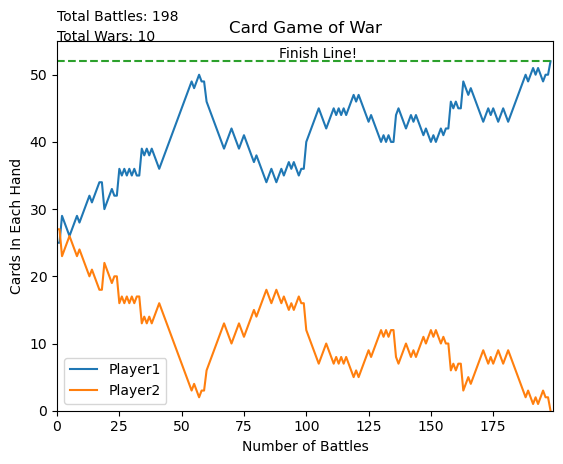

Player 1 Stats
          NUMBER
count  26.000000
mean    7.538462
std     4.110774
min     2.000000
25%     4.000000
50%     7.000000
75%    11.500000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.461538
std     3.431976
min     2.000000
25%     6.000000
50%     9.000000
75%    11.000000
max    14.000000
Player1 Wins!
Battle Count: 89
War Count: 7


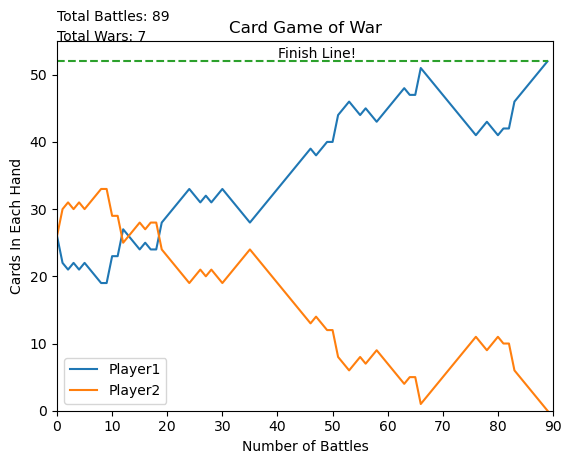

Player 1 Stats
          NUMBER
count  26.000000
mean    8.153846
std     4.046651
min     2.000000
25%     4.250000
50%     8.000000
75%    12.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.846154
std     3.563058
min     2.000000
25%     5.250000
50%     8.000000
75%    10.000000
max    14.000000
Player1 Wins!
Battle Count: 190
War Count: 12


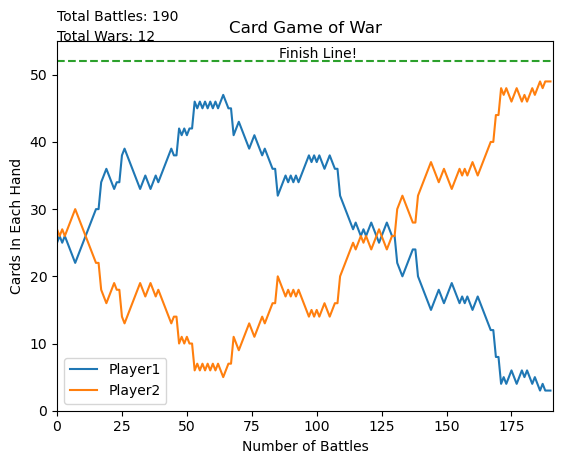

Player 1 Stats
          NUMBER
count  26.000000
mean    7.846154
std     3.926243
min     2.000000
25%     4.500000
50%     7.500000
75%    10.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.153846
std     3.695319
min     2.000000
25%     5.000000
50%     8.500000
75%    11.750000
max    14.000000
Player1 Wins!
Battle Count: 90
War Count: 7


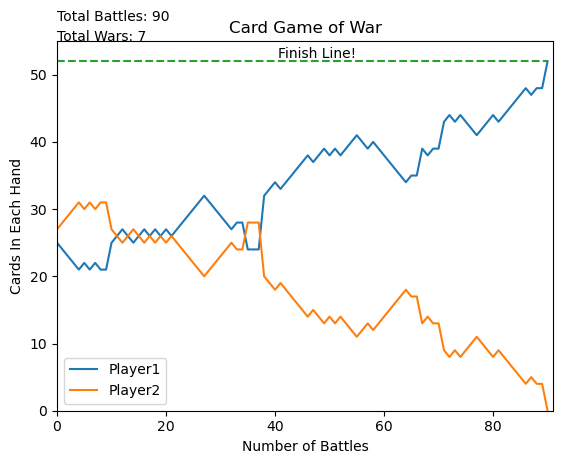

Player 1 Stats
          NUMBER
count  26.000000
mean    8.153846
std     3.823007
min     2.000000
25%     5.000000
50%     8.500000
75%    11.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.846154
std     3.802024
min     2.000000
25%     5.250000
50%     7.500000
75%    10.000000
max    14.000000
Player1 Wins!
Battle Count: 375
War Count: 16


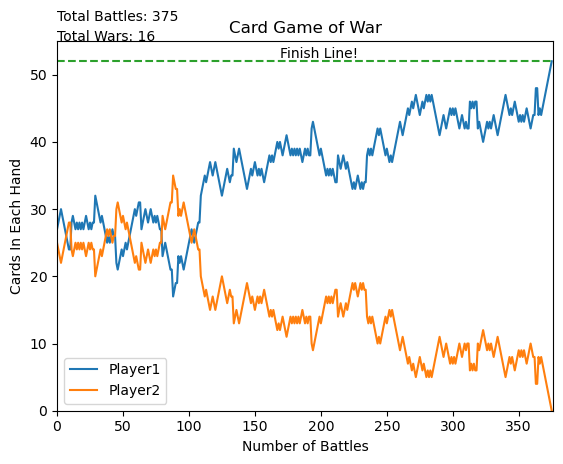

Player 1 Stats
          NUMBER
count  26.000000
mean    7.846154
std     3.460547
min     2.000000
25%     5.000000
50%     8.500000
75%    10.750000
max    13.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.153846
std     4.134657
min     2.000000
25%     4.500000
50%     8.000000
75%    11.750000
max    14.000000
Player1 Wins!
Battle Count: 197
War Count: 20


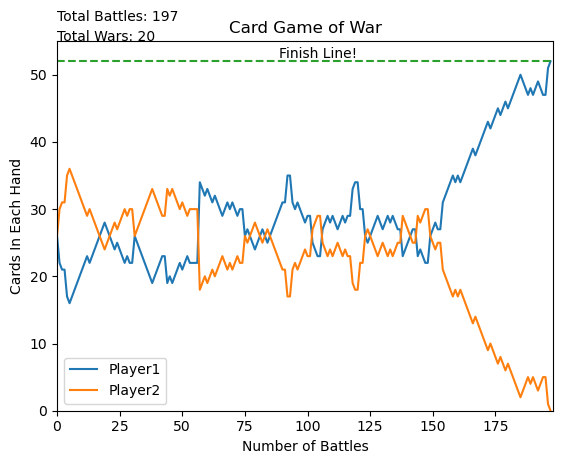

Player 1 Stats
          NUMBER
count  26.000000
mean    7.423077
std     4.187344
min     2.000000
25%     4.000000
50%     6.000000
75%    10.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.576923
std     3.300583
min     2.000000
25%     7.000000
50%     8.500000
75%    11.000000
max    14.000000
Player1 Wins!
Battle Count: 105
War Count: 5


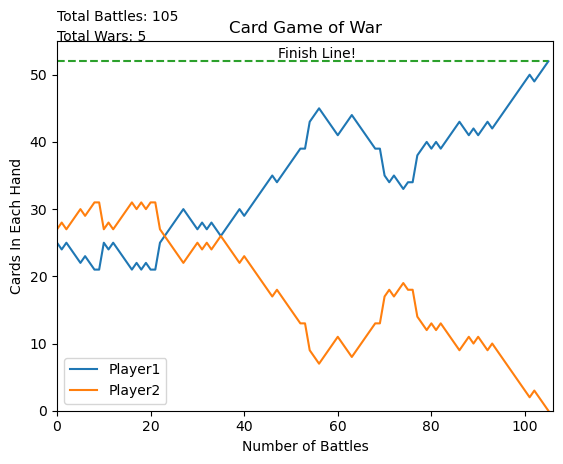

Player 1 Stats
          NUMBER
count  26.000000
mean    8.384615
std     4.040564
min     2.000000
25%     5.250000
50%     8.000000
75%    12.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.615385
std     3.533575
min     2.000000
25%     4.250000
50%     8.000000
75%    10.750000
max    13.000000
Player1 Wins!
Battle Count: 25
War Count: 5


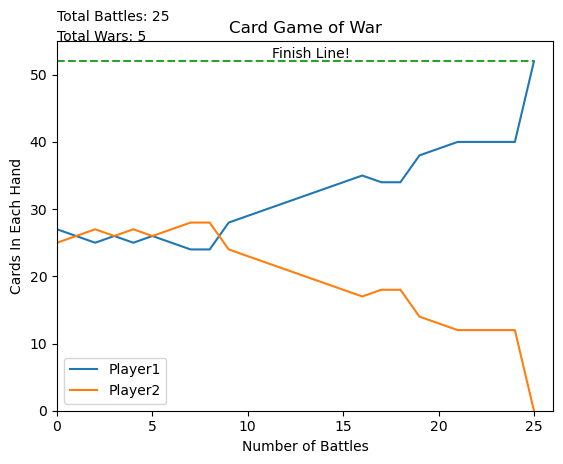

Player 1 Stats
          NUMBER
count  26.000000
mean    7.538462
std     4.002307
min     2.000000
25%     4.250000
50%     6.500000
75%    10.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.461538
std     3.557873
min     2.000000
25%     6.250000
50%     8.500000
75%    11.000000
max    14.000000
Player1 Wins!
Battle Count: 331
War Count: 13


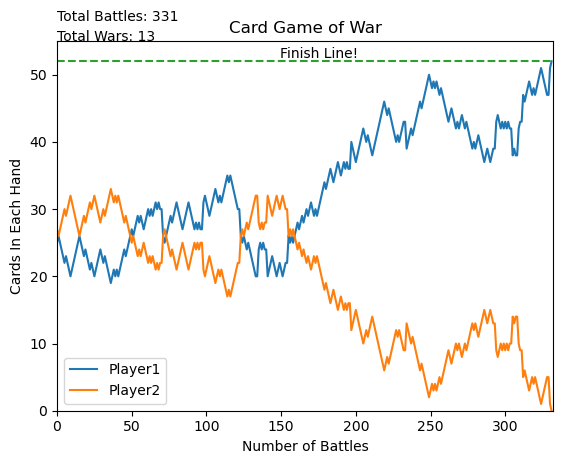

Player 1 Stats
          NUMBER
count  26.000000
mean    7.961538
std     3.682182
min     2.000000
25%     5.000000
50%     7.500000
75%    11.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.038462
std     3.944422
min     2.000000
25%     5.000000
50%     8.000000
75%    11.000000
max    14.000000
Player1 Wins!
Battle Count: 246
War Count: 18


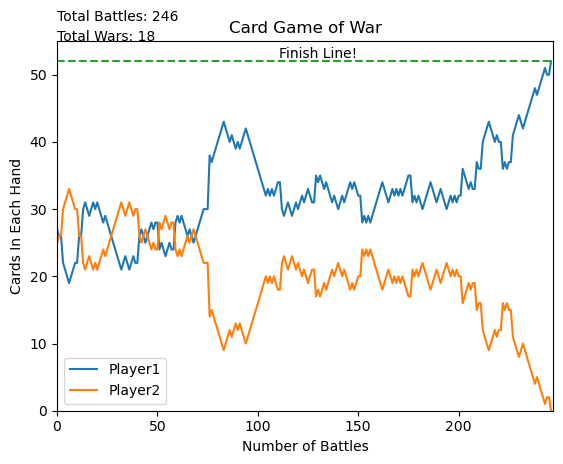

Player 1 Stats
          NUMBER
count  26.000000
mean    8.384615
std     3.940324
min     2.000000
25%     5.250000
50%     8.500000
75%    11.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.615385
std     3.645018
min     2.000000
25%     4.250000
50%     7.500000
75%    10.750000
max    14.000000
Player1 Wins!
Battle Count: 251
War Count: 13


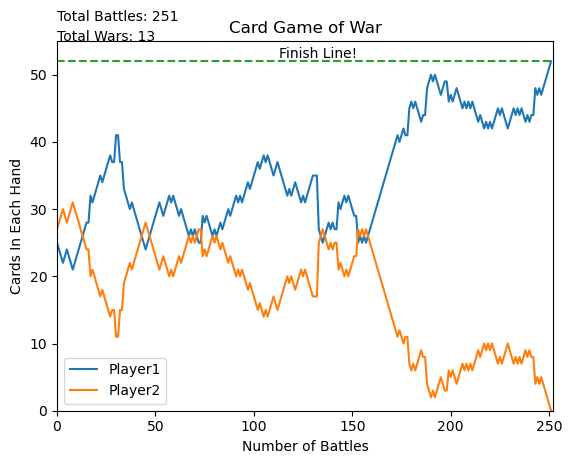

Player 1 Stats
          NUMBER
count  26.000000
mean    7.500000
std     3.754997
min     2.000000
25%     5.000000
50%     8.000000
75%     9.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.500000
std     3.807887
min     2.000000
25%     5.250000
50%     9.500000
75%    11.750000
max    14.000000
Player1 Wins!
Battle Count: 147
War Count: 11


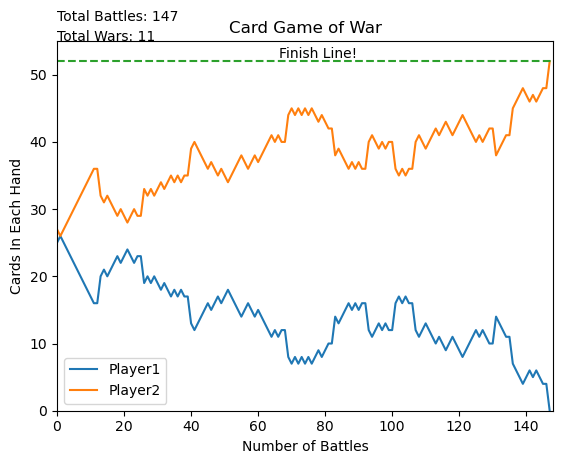

Player 1 Stats
          NUMBER
count  26.000000
mean    7.923077
std     3.697816
min     2.000000
25%     5.000000
50%     7.500000
75%    11.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.076923
std     3.928593
min     2.000000
25%     4.500000
50%     9.000000
75%    11.500000
max    14.000000
Player1 Wins!
Battle Count: 143
War Count: 9


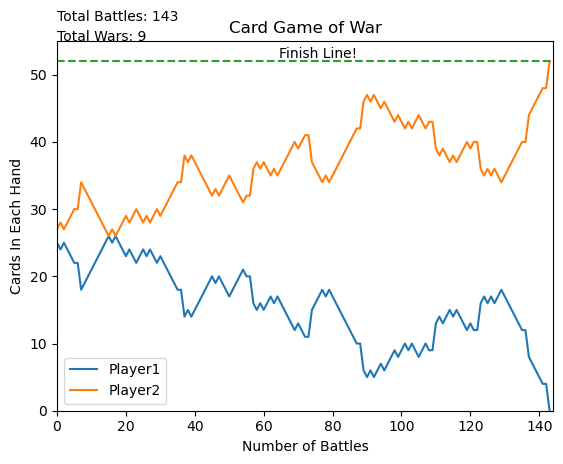

Player 1 Stats
          NUMBER
count  26.000000
mean    8.423077
std     3.838469
min     2.000000
25%     5.000000
50%     9.000000
75%    11.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.576923
std     3.743507
min     2.000000
25%     5.000000
50%     7.000000
75%    11.000000
max    14.000000
Player1 Wins!
Battle Count: 742
War Count: 39


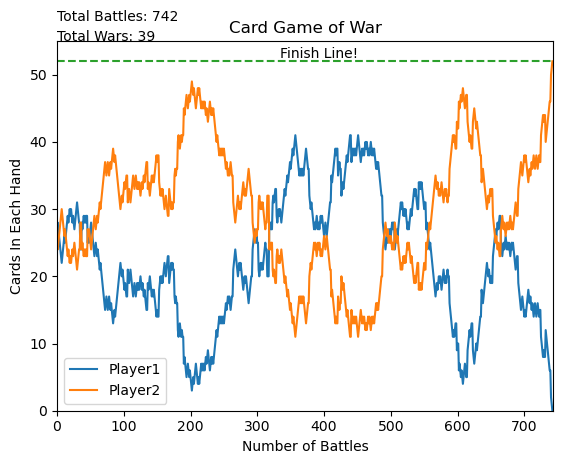

Player 1 Stats
          NUMBER
count  26.000000
mean    7.846154
std     3.864633
min     2.000000
25%     4.250000
50%     8.000000
75%    10.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.153846
std     3.759705
min     2.000000
25%     5.250000
50%     8.000000
75%    11.000000
max    14.000000
Player1 Wins!
Battle Count: 192
War Count: 13


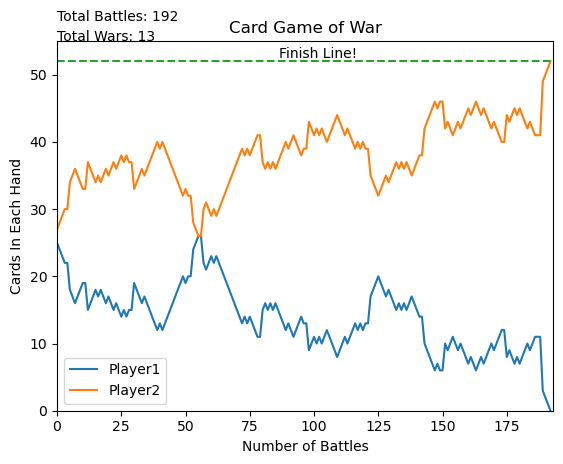

Player 1 Stats
          NUMBER
count  26.000000
mean    7.730769
std     3.852871
min     2.000000
25%     4.250000
50%     7.500000
75%    11.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.269231
std     3.758273
min     2.000000
25%     5.250000
50%     8.000000
75%    11.750000
max    14.000000
Player1 Wins!
Battle Count: 187
War Count: 13


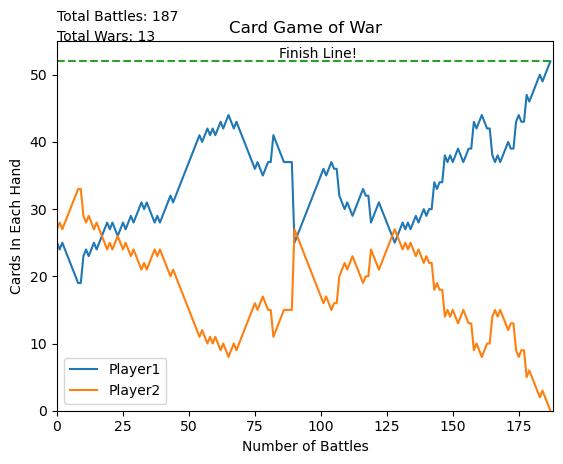

Player 1 Stats
          NUMBER
count  26.000000
mean    7.730769
std     4.152664
min     2.000000
25%     4.000000
50%     7.500000
75%    11.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.269231
std     3.424123
min     2.000000
25%     6.000000
50%     8.500000
75%    10.750000
max    14.000000
Player1 Wins!
Battle Count: 181
War Count: 15


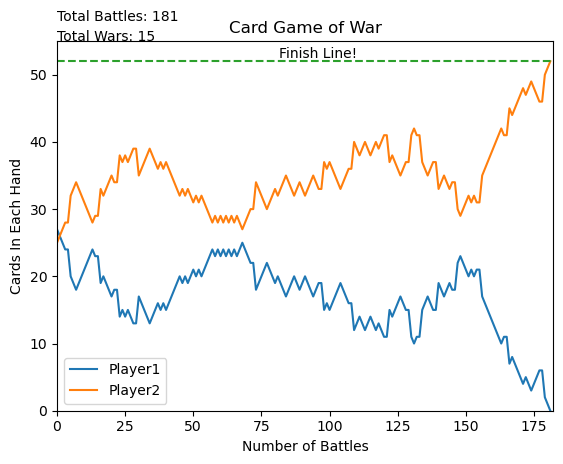

Player 1 Stats
          NUMBER
count  26.000000
mean    8.961538
std     3.924087
min     2.000000
25%     6.250000
50%     9.500000
75%    12.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.038462
std     3.434889
min     2.000000
25%     4.250000
50%     6.500000
75%     9.750000
max    13.000000
Player1 Wins!
Battle Count: 480
War Count: 25


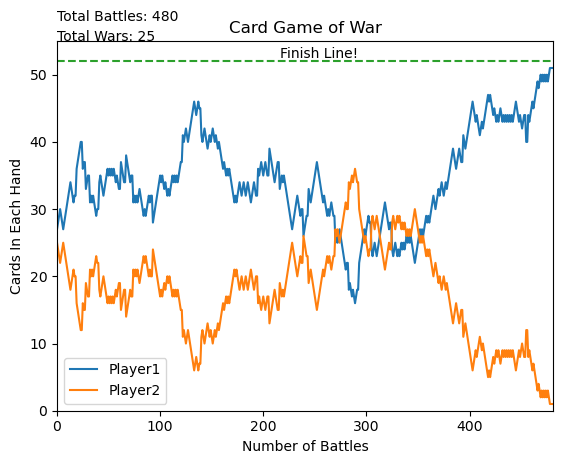

Player 1 Stats
          NUMBER
count  26.000000
mean    7.923077
std     3.665221
min     2.000000
25%     5.250000
50%     7.000000
75%    10.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.076923
std     3.959021
min     2.000000
25%     4.250000
50%     8.500000
75%    11.000000
max    14.000000
Player1 Wins!
Battle Count: 31
War Count: 4


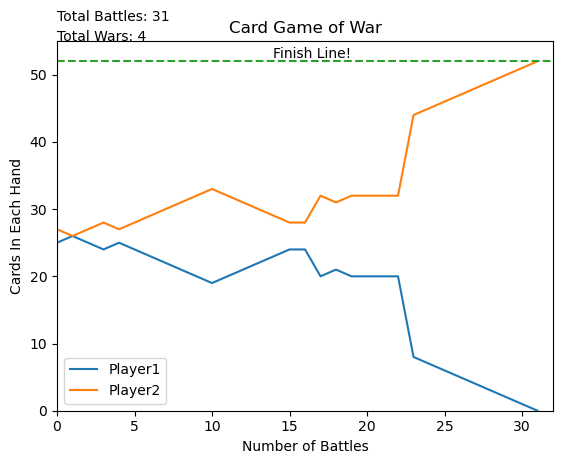

Player 1 Stats
          NUMBER
count  26.000000
mean    7.384615
std     3.544877
min     2.000000
25%     5.250000
50%     7.500000
75%     9.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.615385
std     3.970662
min     3.000000
25%     4.250000
50%    10.000000
75%    11.750000
max    14.000000
Player1 Wins!
Battle Count: 158
War Count: 10


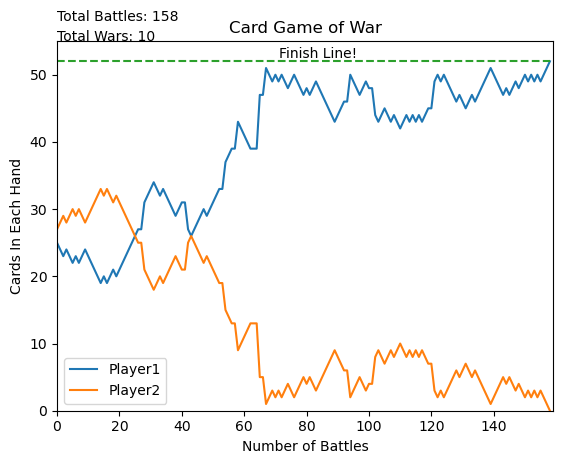

Player 1 Stats
          NUMBER
count  26.000000
mean    8.692308
std     3.739190
min     2.000000
25%     5.500000
50%     9.500000
75%    11.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.307692
std     3.760524
min     2.000000
25%     4.250000
50%     6.500000
75%     9.750000
max    14.000000
Player1 Wins!
Battle Count: 294
War Count: 14


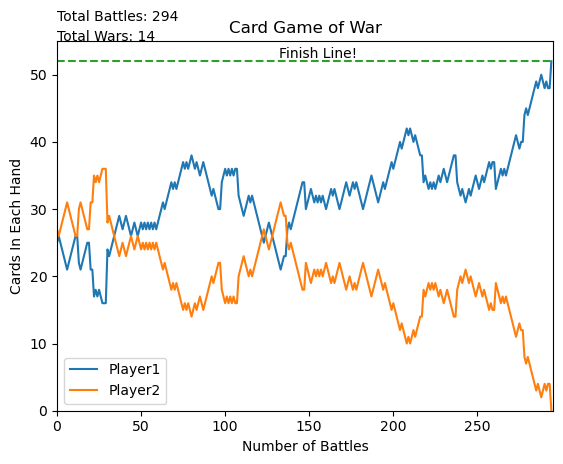

Player 1 Stats
          NUMBER
count  26.000000
mean    7.692308
std     3.886070
min     2.000000
25%     4.250000
50%     7.000000
75%    10.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.307692
std     3.717733
min     2.000000
25%     6.000000
50%     8.000000
75%    11.750000
max    14.000000
Player1 Wins!
Battle Count: 120
War Count: 7


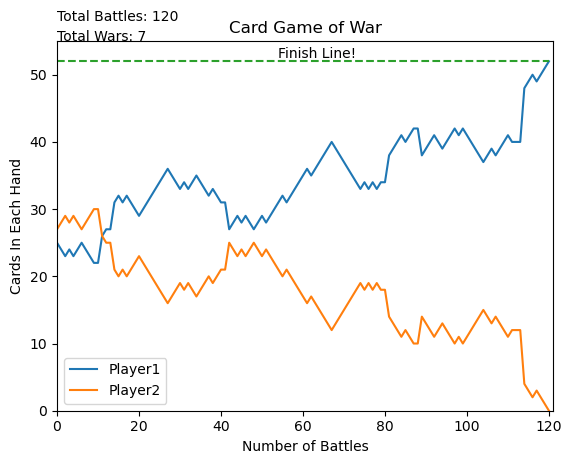

Player 1 Stats
          NUMBER
count  26.000000
mean    7.923077
std     3.199038
min     3.000000
25%     5.250000
50%     8.000000
75%    10.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.076923
std     4.344404
min     2.000000
25%     4.250000
50%     7.500000
75%    12.000000
max    14.000000
Player1 Wins!
Battle Count: 357
War Count: 19


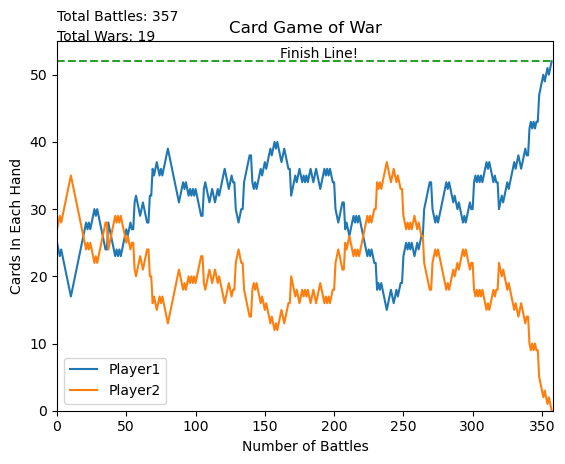

Player 1 Stats
          NUMBER
count  26.000000
mean    8.038462
std     3.627459
min     2.000000
25%     5.250000
50%     8.000000
75%    11.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.961538
std     3.994804
min     2.000000
25%     4.000000
50%     8.000000
75%    11.750000
max    14.000000
Player1 Wins!
Battle Count: 185
War Count: 16


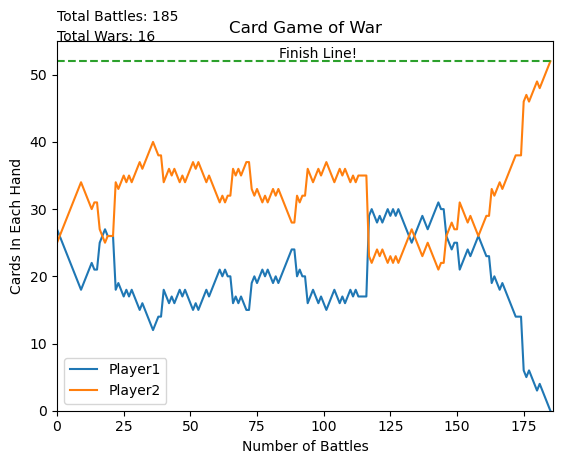

Player 1 Stats
          NUMBER
count  26.000000
mean    8.000000
std     3.644173
min     2.000000
25%     5.250000
50%     7.500000
75%    10.750000
max    14.000000
Player 2 Stats
         NUMBER
count  26.00000
mean    8.00000
std     3.97995
min     2.00000
25%     4.25000
50%     8.50000
75%    11.00000
max    14.00000
Player1 Wins!
Battle Count: 843
War Count: 54


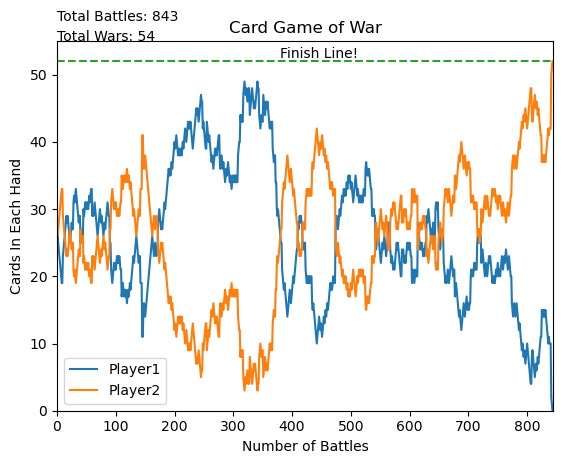

Player 1 Stats
          NUMBER
count  26.000000
mean    7.807692
std     4.030079
min     2.000000
25%     4.250000
50%     6.500000
75%    11.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    8.192308
std     3.577924
min     2.000000
25%     6.250000
50%     8.500000
75%    10.750000
max    14.000000
Player1 Wins!
Battle Count: 431
War Count: 27


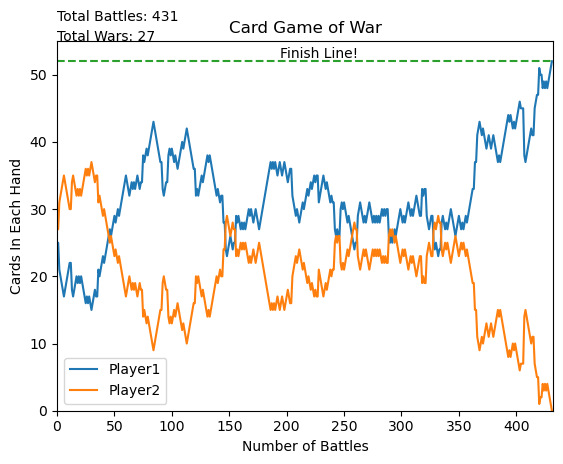

Player 1 Stats
          NUMBER
count  26.000000
mean    8.884615
std     3.829641
min     2.000000
25%     6.250000
50%     9.500000
75%    12.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.115385
std     3.581362
min     2.000000
25%     4.250000
50%     6.500000
75%     9.750000
max    14.000000
Player1 Wins!
Battle Count: 54
War Count: 7


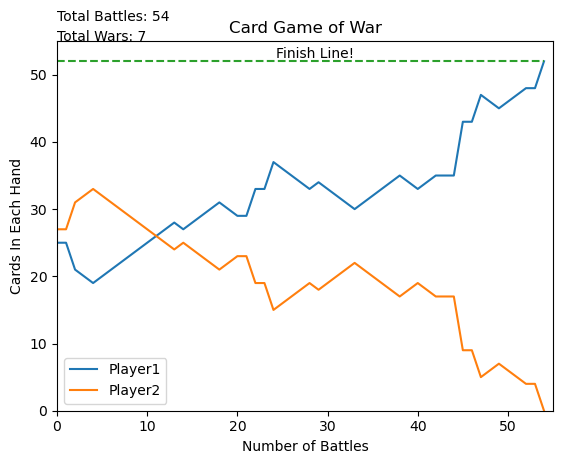

Player 1 Stats
          NUMBER
count  26.000000
mean    8.230769
std     3.839872
min     2.000000
25%     5.000000
50%     9.000000
75%    11.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.769231
std     3.776853
min     2.000000
25%     5.000000
50%     7.000000
75%    11.000000
max    14.000000
Player1 Wins!
Battle Count: 68
War Count: 3


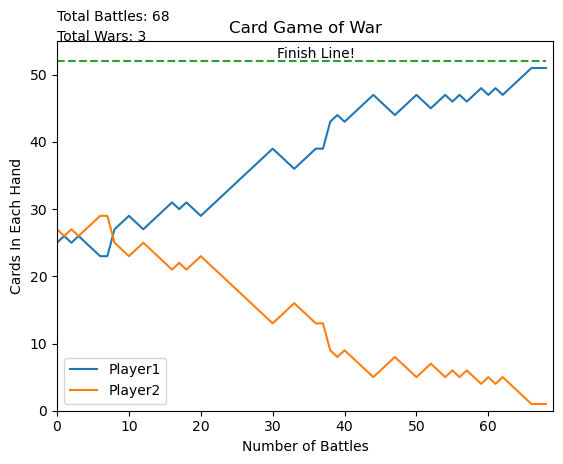

Player 1 Stats
          NUMBER
count  26.000000
mean    8.461538
std     3.701143
min     3.000000
25%     5.250000
50%     9.000000
75%    11.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.538462
std     3.870202
min     2.000000
25%     4.250000
50%     7.500000
75%    10.750000
max    14.000000
Player1 Wins!
Battle Count: 247
War Count: 13


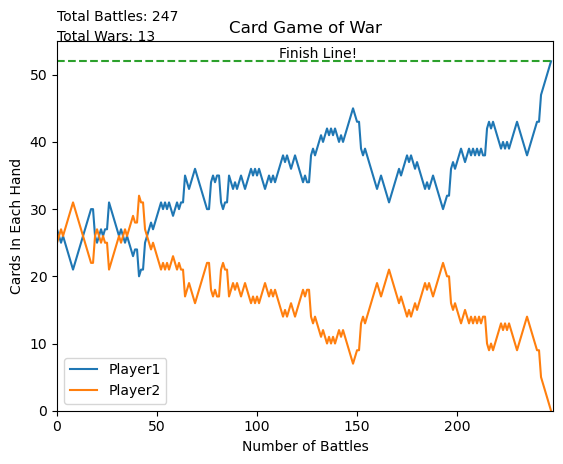

Player 1 Stats
          NUMBER
count  26.000000
mean    9.192308
std     3.212715
min     4.000000
25%     7.000000
50%     9.000000
75%    12.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    6.807692
std     3.980143
min     2.000000
25%     3.000000
50%     6.000000
75%    10.000000
max    14.000000
Player1 Wins!
Battle Count: 53
War Count: 4


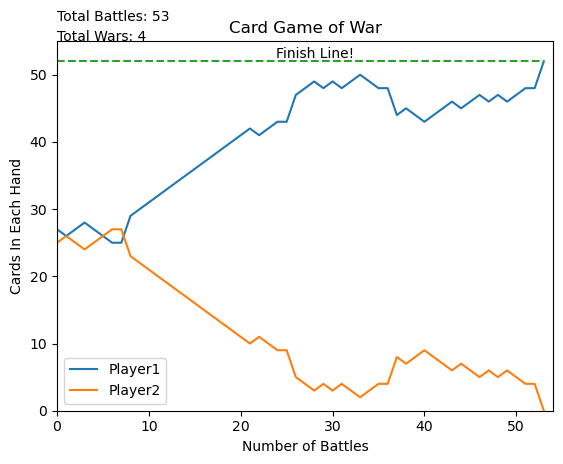

Player 1 Stats
          NUMBER
count  26.000000
mean    9.038462
std     3.638470
min     3.000000
25%     6.250000
50%     9.000000
75%    12.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    6.961538
std     3.693029
min     2.000000
25%     3.500000
50%     6.500000
75%    10.000000
max    14.000000
Player1 Wins!
Battle Count: 52
War Count: 3


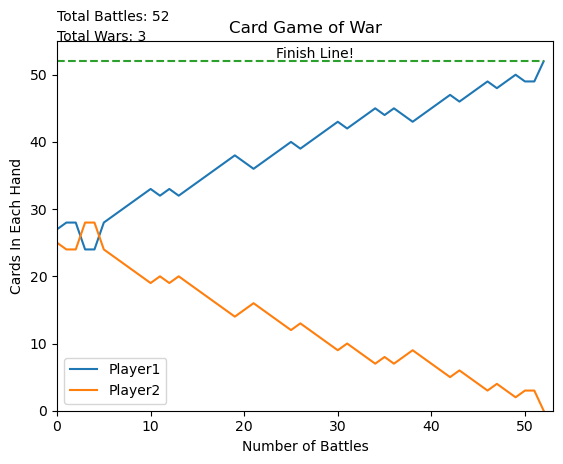

Player 1 Stats
          NUMBER
count  26.000000
mean    8.192308
std     4.030079
min     2.000000
25%     5.000000
50%     8.000000
75%    11.750000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.807692
std     3.577924
min     2.000000
25%     5.000000
50%     7.500000
75%    11.000000
max    13.000000
Player1 Wins!
Battle Count: 1097
War Count: 73


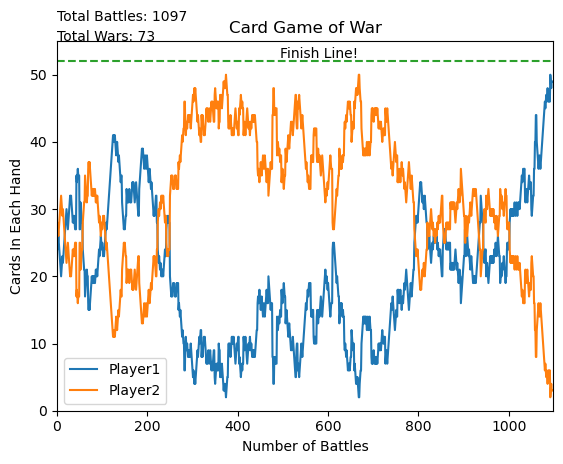

Player 1 Stats
          NUMBER
count  26.000000
mean    8.500000
std     4.032369
min     2.000000
25%     5.250000
50%     8.500000
75%    12.000000
max    14.000000
Player 2 Stats
          NUMBER
count  26.000000
mean    7.500000
std     3.512834
min     2.000000
25%     5.000000
50%     7.000000
75%    10.000000
max    14.000000
Player1 Wins!
Battle Count: 120
War Count: 7


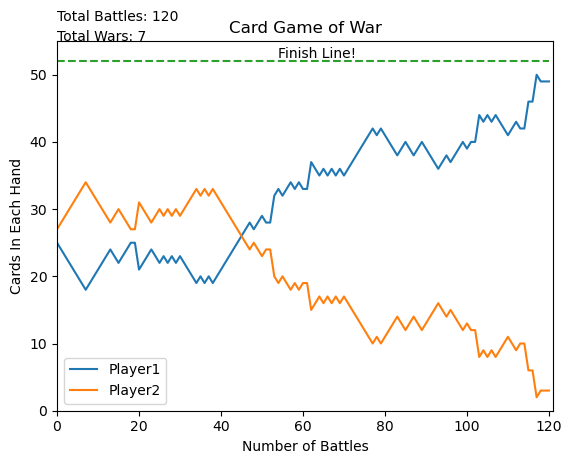

CPU times: total: 47.3 s
Wall time: 47.9 s


In [62]:
%%time
#play the game x times
for i in range(100):

    #Make the graph
    fig = plt.figure()
    plt.title('Card Game of War')
    plt.xlabel('Number of Battles')
    plt.ylabel('Cards In Each Hand')
    plt.ylim([0,55])

    #shuffle deck and deal
    np.random.shuffle(deck)
    player1 = np.array_split(deck,2)[0]
    deck_rows = deck.view([('', deck.dtype)] * deck.shape[1])
    player1_rows = player1.view([('', player1.dtype)] * player1.shape[1])
    player2 = np.setdiff1d(deck_rows, player1_rows).view(deck.dtype).reshape(-1, player1.shape[1])

    #Deal Data
    print('Player 1 Stats')
    player1_df = pd.DataFrame(player1, columns=['NUMBER', 'SUIT'])
    player1_df['NUMBER'] = player1_df.NUMBER.astype(float)
    print(player1_df.describe())

    print('Player 2 Stats')
    player2_df = pd.DataFrame(player2, columns=['NUMBER', 'SUIT'])
    player2_df['NUMBER'] = player2_df.NUMBER.astype(float)
    print(player2_df.describe())

    #Time to play
    battles = 0
    war = 0
    war_count=0
    player1_score = []
    player2_score = []
    battle(player1, player2, battles, war, war_count, player1_score, player2_score)
    plt.show()